# High Value Customers Identification (Insiders) #
**By: Marx Cerqueira**

DESCRIPTION
Background of Problem Statement:
A UK-based online retail store has captured the sales data for different products for the period of one year (Nov 2016 to Dec 2017).

The organization sells gifts primarily on the online platform. The customers who make a purchase consume directly for themselves.
There are small businesses that buy in bulk and sell to other customers through the retail outlet channel.

Project Objective:
Find significant customers for the business who make high purchases of their favourite products. The organization wants to roll out a loyalty program to the high-value customers after identification of segments. Use the clustering methodology to segment customers into groups:

Project Planing IOT

** Input**

**Ciclo 0**: Planejamento - Método IOT


**Ciclo 1**: Métricas de Validação de Clusters

    1. Feature Engineering
        - RecênciaFrequênciaMonetização

    2. Métricas de validação de Clustering
        - WSS ( Within-Cluster Sum of Square )  SS ( Silhouette Score )

    3. Cluster Analysis
        - Plot 3DCluster Profile
        
**Ciclo 2**: Análise de Silhouettes

    1. Feature Engineering
        - Average Ticket

    2. Análise de Silhouette
        - Silhouette Analysis

    3. Cluster Visualization
        - UMAP
        
    4. Cluster Análise de Perfil
        -Descrição dos centróides dos clusters

**Ciclo 3**: Statistical Descriptive

    1. Análise Descritiva
        - Atributos numéricosAtributos categóricos

    2. Feature Engineering
        - Average RecencyNumber of Returns

    3. Data preparation
        - Standard Scaler

## Project Solution Planning

### Input

1. Problema de Negócio
    - Selecionar os clientes mais valiosos para integrar um programa de fidelização
2. Conjunto de dados
    - Vendas de um ecommerce, durante um período de um ano (nov 2015 to Dec 2017(

### Output


1. Indicação das pessoas que farão parte do programa de fidelização (insiders)
    - Lista: client_id > Is insider
             11321     > yes/1
             14332     > no/1
             
2. Relatório com as respostas das perguntas de negócio

    - Quem são as pessoas elegíveis para participar do programa de Insiders ?
    - Quantos clientes farão parte do grupo?
    - Quais as principais características desses clientes ?
    - Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?
    - Qual a expectativa de faturamento desse grupo para os próximos meses ?
    - Quais as condições para uma pessoa ser elegível ao Insiders ?
    - Quais as condições para uma pessoa ser removida do Insiders ?
    - Qual a garantia que o programa Insiders é melhor que o restante da base ?
    - Quais ações o time de marketing pode realizar para aumentar o faturamento?

### Tasks

1. **Quem são as pessoas elegíveis para participar do programa de Insiders ?**
    - O que é ser elegível? O que são clientes de maior "valor"?
    - Faturamento: ** criação de features **
        - Alto Ticket Médio (média do valor gasto por cliente, quanto o cliente gasta na média com a empresa;
        - Alto LTV (Life Time Value);
        - Baixa Recência (tempo da última compra), queremos uma recência menor ou Alta Frequência (tempo entre as compras);
        - Alto basket size;
        - Baixa probabilidade de Churn;
        - Alta previsão de LTV;
        - Alta propensão de compra;
        
    - Custos:
        - Baixa taxa de devolução; A empresa tem um custo por devolução, normalmente essa taxa é definida no modelo de negócio da empresa (business plan);        
        
    - Experiência de compra:
        - Média alta das avaliações
    
2. **Quantos clientes farão parte do grupo?**
    - Número total de clientes
    - % do grupo Insiders
    
    
3. **Quais as principais características desses clientes ?**
    - Escrever as características do cliente:
        - Idade
        - Localização 
        - em resumo é o look a like
    - Escrever características do consumo.
        - Atributos da clusterização;

4. **Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?**
    - Faturamento total do ano
    - Faturamento do grupo Insiders (verificar quantos % da receita total vem desse grupo)
    
5. **Qual a expectativa de faturamento desse grupo para os próximos meses ?**
    - LTV do grupo Insiders
    - Análise de Cohort
6. **Quais as condições para uma pessoa ser elegível ao Insiders ?**
    - Definir a periodicidade do modelo (1 mes, 3 meses...)
    - O "desempenho" do cliente está próximo da média do cluster Insiders
    
7. **Quais as condições para uma pessoa ser removida do Insiders ?**
    - Definir a periodicidade do modelo (1 mes, 3 meses...)
    - A pessoa precisa ser desimilar ou não-parecido com uma pessoa do grupo
    
8. **Qual a garantia que o programa Insiders é melhor que o restante da base ?**
    - Teste A/B
    - Teste A/B Bayesiano
    - Teste de hipóteses.
    
9. **Quais ações o time de marketing pode realizar para aumentar o faturamento?**
    - Desconto
    - Preferencia de compra
    - Frete
    - Visita a empresa, etc.

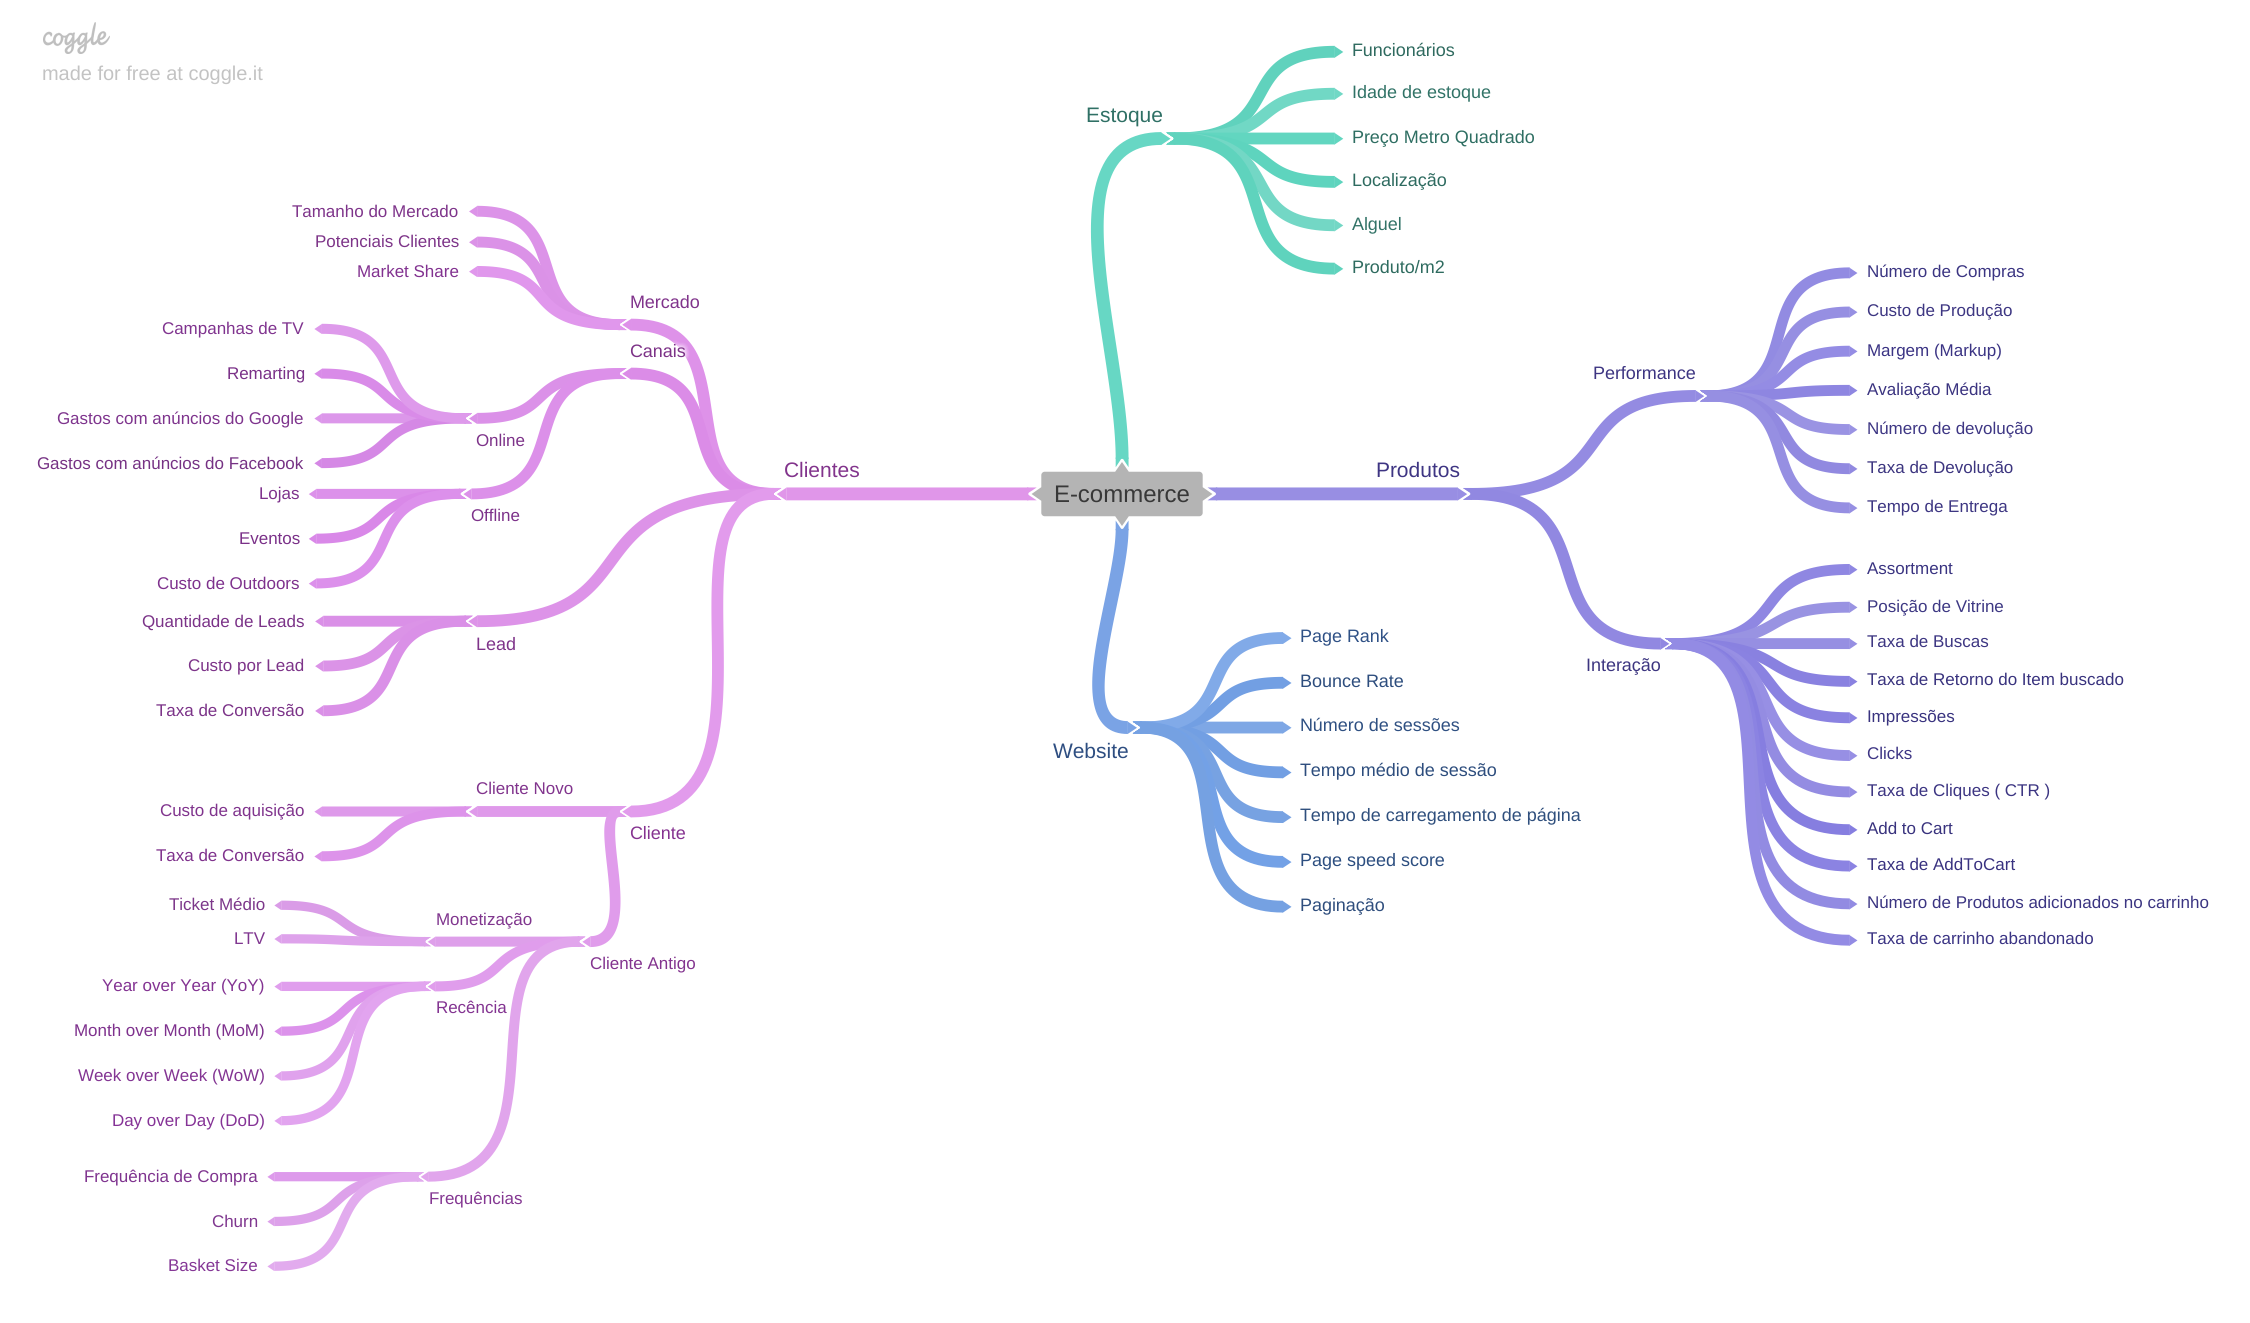

In [1]:
from IPython.display import Image
Image(filename='/home/marxcerqueira/repos/Kaggle-HighValue-Custormers-Identification/reports/figures/mapa_metricas_e_commerce.png')

## E-commerce Metrics

- **Growth Metrics**:
    1. Porcentagem do Marketshare
    2. Número de Clientes Novos
- **Revenue Metrics**:
    1. Número de Vendas
    2. Ticket Médio
    3. LTV ( Long Time Value )
    4. Recência Média
    5. Basket Size Médio
    6. Markup médio
- **Cost Metrics**:
    1. CAC ( Custo de aquisição de Clientes )
    2. Desconto médio
    3. Custo de Produção
    4. Taxa de devolução
    5. Custos Fixos ( Folha de pagamento, escritório, softwares )
    6. Impostos

## Benchmark de Soluções

Desk Research
1. Fazer pesquisas sobre o que as pessoas já fizeram, quais problemas de clusterização resolveram e como resolveram.
2. Leitura dos artigos
3. Resultado: 3 ou 4 soluções que você entendeu, e verificar o que da pra aproveitar para o nosso contexto.

# IMPORTS

In [146]:
import os
import inflection

import numpy   as np
import pandas  as pd
import seaborn as sns

import umap.umap_ as umap

from IPython.display import HTML
from matplotlib import pyplot as plt

from pandas_profiling import ProfileReport

from sklearn import metrics       as m
from sklearn import preprocessing as pp
from sklearn import decomposition as dd
from sklearn import ensemble      as en
from sklearn import manifold      as mn
from sklearn import mixture       as mx
from sklearn import cluster       as c

from scipy.cluster import hierarchy as hc

from plotly import express as px

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

## Helper Functions

In [4]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [5]:
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Loading Data

In [6]:
df_ecomm_raw = pd.read_csv('/home/marxcerqueira/repos/Kaggle-HighValue-Custormers-Identification/data/raw/Ecommerce.csv',
                           encoding='iso-8859-1',
                           low_memory=False)

In [7]:
df_ecomm_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN


In [8]:
df_ecomm_raw = df_ecomm_raw.drop(columns = ['Unnamed: 8'], axis = 1)

In [9]:
df_ecomm_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


# DATA DISCRIPTION

In [10]:
# Copy dataset
df0 = df_ecomm_raw.copy()

## Rename Columns

In [11]:
list(df0)

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

In [12]:
cols_old = ['InvoiceNo','StockCode','Description','Quantity', 'InvoiceDate','UnitPrice','CustomerID','Country']

snakecase = lambda x: inflection.underscore(x)
col_news = list(map(snakecase, cols_old))

# Rename columns
df0.columns = col_news

In [13]:
df0.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country'],
      dtype='object')

Attribute Description:

    - InvoiceNo: Invoice number (A 6-digit integral number uniquely assigned to each transaction)
    - StockCode: Product (item) code
    - Description: Product (item) name
    - Quantity The quantities of each product (item) per transaction
    - InvoiceDate: The day when each transaction was generated
    - UnitPrice: Unit price (Product price per unit)
    - CustomerID: Customer number (Unique ID assigned to each customer)
    - Country: Country name (The name of the country where each customer resides)

## Data Dimension

In [14]:
df0.shape

(541909, 8)

In [15]:
print('Number of rows: {}.'.format(df0.shape[0]))
print('Number of cols: {}.'.format(df0.shape[1]))

Number of rows: 541909.
Number of cols: 8.


## Data Types

In [16]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_no    541909 non-null  object 
 1   stock_code    541909 non-null  object 
 2   description   540455 non-null  object 
 3   quantity      541909 non-null  int64  
 4   invoice_date  541909 non-null  object 
 5   unit_price    541909 non-null  float64
 6   customer_id   406829 non-null  float64
 7   country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Check NA Values

In [17]:
missing_count = df0.isnull().sum() # the count of missing values
value_count = df0.isnull().count() # the total values count

missing_percentage = round(missing_count/value_count*100,2) # the percentage of missing values
missing_df = pd.DataFrame({'missing value count': missing_count, 'percentage': missing_percentage})
missing_df

,missing value count,percentage
invoice_no,0,0.00
stock_code,0,0.00
description,1454,0.27
quantity,0,0.00
invoice_date,0,0.00
unit_price,0,0.00
customer_id,135080,24.93
country,0,0.00


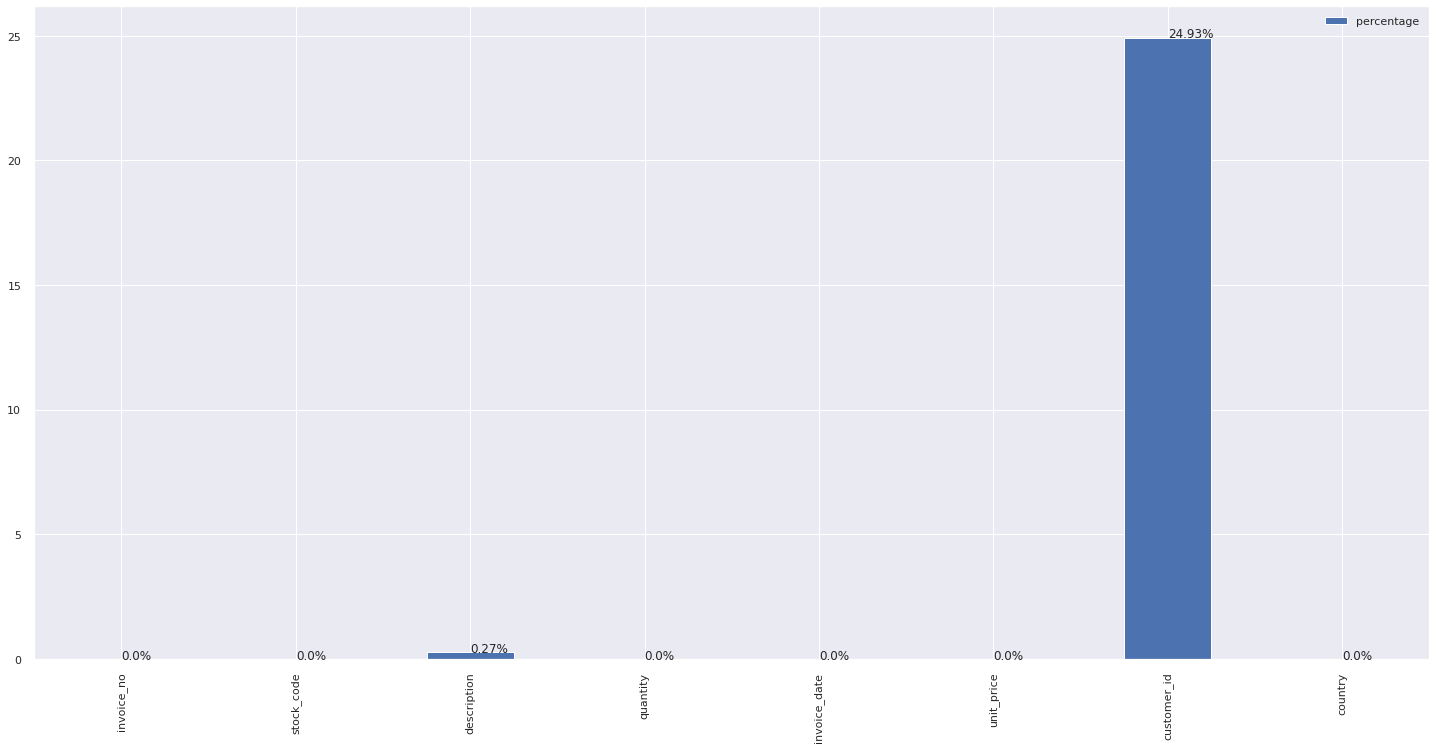

In [18]:
barchart = missing_df.plot.bar(y='percentage')
for index, percentage in enumerate( missing_percentage ):
    barchart.text( index, percentage, str(percentage)+'%')

## Fillout NA

In [19]:
# separate NA's in two different dataframe, one with NAs and other without it
df_missing = df0.loc[df0['customer_id'].isna(), :]
df_not_missing = df0.loc[~df0['customer_id'].isna(), :]

In [20]:
df_missing.shape

(135080, 8)

In [21]:
df_not_missing.shape

(406829, 8)

In [22]:
## Fillout NA stratety, creating customers_id to keep their behavior (25% of the database)
df_not_missing['customer_id'].max()

18287.0

In [23]:
# create reference
df_backup = pd.DataFrame( df_missing['invoice_no'].drop_duplicates().copy() )
df_backup['customer_id'] = np.arange( 19000, 19000+len( df_backup ), 1) # Fillout NA stratety: creating customers_id to keep their behavior (25% of the database)

# merge original with reference dataframe
df0 = pd.merge( df0, df_backup, on='invoice_no', how='left' )

# coalesce 
df0['customer_id'] = df0['customer_id_x'].combine_first( df0['customer_id_y'] )

# drop extra columns
df0 = df0.drop( columns=['customer_id_x', 'customer_id_y'], axis=1 )

In [24]:
df0.isna().sum()

invoice_no         0
stock_code         0
description     1454
quantity           0
invoice_date       0
unit_price         0
country            0
customer_id        0
dtype: int64

## Change Types

In [25]:
# Transforme datatype of variable invoice_date to datetime
df0['invoice_date'] = pd.to_datetime(df0['invoice_date'])

In [26]:
df0['customer_id'] = df0['customer_id'].astype('int64')

In [27]:
df0.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
country                 object
customer_id              int64
dtype: object

## Descriptive Statistics

In [28]:
df0.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
unit_price,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
customer_id,541909.0,16688.840453,2911.411352,12346.00,14367.00,16249.00,18283.00,22709.0


In [29]:
df0.describe(include = object).T

,count,unique,top,freq
invoice_no,541909,25900,573585,1114
stock_code,541909,4070,85123A,2313
description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
country,541909,38,United Kingdom,495478


In [30]:
num_attributes = df0.select_dtypes(include = number)
cat_attributes = df0.select_dtypes(exclude = [number, np.datetime64])

### Numerical Attributes

In [31]:
# central tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# dispersion - desvio padrão, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(np.min)).T
d3 = pd.DataFrame(num_attributes.apply(np.max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max()-x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

#concatenate

m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'mediana','std', 'skew','kurtosis']
m

,attributes,min,max,range,mean,mediana,std,skew,kurtosis
0,quantity,-80995.00,80995.0,161990.00,9.552250,3.00,218.080957,-0.264076,119769.160031
1,unit_price,-11062.06,38970.0,50032.06,4.611114,2.08,96.759764,186.506972,59005.719097
2,customer_id,12346.00,22709.0,10363.00,16688.840453,16249.00,2911.408666,0.487449,-0.804287


**Num Attributes Investigating**:

    1. Quantity negativa (pode ser devolução?)
    2. Preço unitário igual a zero e negativo(pode ser promoção?)

### Categorical Attributes

In [32]:
cat_attributes.head()

,invoice_no,stock_code,description,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
1,536365,71053,WHITE METAL LANTERN,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom


#### Invoice_No

In [33]:
# problem: We got letters and numbers in invoice_no
#df1['invoice_no'].astype( int )

# identification: 
df_letter_invoices = df0.loc[df0['invoice_no'].apply( lambda x: bool( re.search( '[^0-9]+', x ) ) ), :]
df_letter_invoices.head()

print( 'Total number of invoices: {}'.format( len( df_letter_invoices ) ) )
print( 'Total number of negative quantity: {}'.format( len( df_letter_invoices[ df_letter_invoices['quantity'] < 0 ] ) ) )

Total number of invoices: 9291
Total number of negative quantity: 9288


#### Stock_Code

In [34]:
# check stock codes only characters
df0.loc[df0['stock_code'].apply( lambda x: bool( re.search( '^[a-zA-Z]+$', x ) ) ), 'stock_code'].unique()

# Acão:
## 1. Remove stock_code in ['POST', 'D', 'M', 'PADS', 'DOT', 'CRUK']

array(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK'], dtype=object)

#### Description

In [35]:
df0.head()

# Action: Delete description

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,United Kingdom,17850
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,United Kingdom,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,United Kingdom,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,United Kingdom,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,United Kingdom,17850


#### Country

In [36]:
df0['country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [37]:
# purchases per country (percentage)
df0['country'].value_counts( normalize=True)*100

United Kingdom          91.431956
Germany                  1.752139
France                   1.579047
EIRE                     1.512431
Spain                    0.467422
Netherlands              0.437527
Belgium                  0.381798
Switzerland              0.369435
Portugal                 0.280305
Australia                0.232327
Norway                   0.200403
Italy                    0.148180
Channel Islands          0.139876
Finland                  0.128250
Cyprus                   0.114779
Sweden                   0.085254
Unspecified              0.082302
Austria                  0.073998
Denmark                  0.071783
Japan                    0.066063
Poland                   0.062926
Israel                   0.054806
USA                      0.053699
Hong Kong                0.053145
Singapore                0.042258
Iceland                  0.033585
Canada                   0.027864
Greece                   0.026942
Malta                    0.023436
United Arab Em

In [38]:
# customers per country-
df0[['customer_id', 'country']].drop_duplicates().groupby( 'country' ).count().reset_index().sort_values( 'customer_id', ascending=False)

,country,customer_id
36,United Kingdom,7587
14,Germany,95
13,France,90
10,EIRE,44
31,Spain,31
3,Belgium,25
33,Switzerland,24
27,Portugal,20
19,Italy,15
16,Hong Kong,15


# VARIABLE FILTERING

In [39]:
df1 = df0.copy()

In [40]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
country                 object
customer_id              int64
dtype: object

In [41]:
 # === Numerical attributes ====
df1 = df1.loc[df1['unit_price'] >= 0.04, :]

# === Categorical attributes ====
df1 = df1[~df1['stock_code'].isin( ['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
                                    'DCGSSGIRL', 'PADS', 'B', 'CRUK'] )]

# description
df1 = df1.drop( columns='description', axis=1 )

# country 
df1 = df1[~df1['country'].isin( ['European Community', 'Unspecified' ] ) ] #assuming this risk so we can use lat long parameters

# bad customers
df1 = df1[~df1['customer_id'].isin([16446])]

# quantity 
df1_returns = df1.loc[df1['quantity'] < 0, :].copy()
df1_purchases = df1.loc[df1['quantity'] >= 0, :].copy()

# FEATURE ENGINEERING

In [42]:
 # Feature Ideas:
## Moving Average - 7d, 14d, 30d
## Quantidade de Compras por mês, antes do dia 15 e depois do dia 15
## Average Financial
## Basket Size * Price - Quantidade de preços por cesta


In [43]:
df2 = df1.copy()

## Feature Creation

In [44]:
df2.head()

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,6,2016-11-29,2.55,United Kingdom,17850
1,536365,71053,6,2016-11-29,3.39,United Kingdom,17850
2,536365,84406B,8,2016-11-29,2.75,United Kingdom,17850
3,536365,84029G,6,2016-11-29,3.39,United Kingdom,17850
4,536365,84029E,6,2016-11-29,3.39,United Kingdom,17850


In [45]:
# data reference
# RFM Model, creating feature for it

df_ref = df2.drop(['invoice_no', 'stock_code',
                   'quantity', 'invoice_date', 'unit_price',
                   'country'], axis = 1).drop_duplicates(ignore_index = True).copy()
df_ref.head()

,customer_id
0,17850
1,13047
2,12583
3,13748
4,15100


### Gross Revenue

In [46]:
# Gross Revenue ( Faturamento ) quantity * price
df1_purchases.loc[:, 'gross_revenue'] = df1_purchases.loc[:,'quantity'] * df1_purchases.loc[:, 'unit_price']

# Monetary (How much money a customer spends on purchases)
df_monetary = df1_purchases.loc[:, ['customer_id', 'gross_revenue']].groupby( 'customer_id' ).sum().reset_index()
df_ref = pd.merge( df_ref, df_monetary, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    91
dtype: int64

### Recency

In [47]:
# Recency - Day from last purchase
df_recency = df1_purchases.loc[:, ['customer_id', 'invoice_date']].groupby( 'customer_id' ).max().reset_index()
df_recency['recency_days'] = ( df1['invoice_date'].max() - df_recency['invoice_date'] ).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()

df_ref = pd.merge( df_ref, df_recency, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id       0
gross_revenue    91
recency_days     91
dtype: int64

### Quantity of Purchases

In [48]:
# Quantity of purchases (quantity of invoice no)
df_freq = (df1_purchases.loc[:, ['customer_id', 'invoice_no']].drop_duplicates()
                                                             .groupby( 'customer_id' )
                                                             .count()
                                                             .reset_index()
                                                             .rename(columns = {'invoice_no': 'qty_invoice_no'}))
df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id        0
gross_revenue     91
recency_days      91
qty_invoice_no    91
dtype: int64

### Quantity of Items Purchased by Customer

In [49]:
# Quantity of items purchased by customer
df_freq = (df1_purchases.loc[:, ['customer_id', 'quantity']].groupby( 'customer_id' ).sum()
                                                           .reset_index()
                                                           .rename( columns={'quantity': 'qty_items'} ) )
df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id        0
gross_revenue     91
recency_days      91
qty_invoice_no    91
qty_items         91
dtype: int64

### Qty Products  (different stock codes by customer)

In [50]:
# Quantity of unique products purchased (Frequency: qntd of products over time)

# Number of products (different stock codes by customer)
df_freq = (df1_purchases.loc[:, ['customer_id', 'stock_code']].groupby( 'customer_id' ).count()
                                                           .reset_index()
                                                           .rename( columns={'stock_code': 'qty_products'} ) )
df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left' )
df_ref.isna().sum()

customer_id        0
gross_revenue     91
recency_days      91
qty_invoice_no    91
qty_items         91
qty_products      91
dtype: int64

### Average Ticket Value.

In [51]:
# Average Ticket Value
df_avg_ticket = df1_purchases.loc[:, ['customer_id', 'gross_revenue']].groupby( 'customer_id' ).mean().reset_index().rename( columns={'gross_revenue':'avg_ticket'} )
df_ref = pd.merge( df_ref, df_avg_ticket, on='customer_id', how='left')
df_ref.isna().sum()

customer_id        0
gross_revenue     91
recency_days      91
qty_invoice_no    91
qty_items         91
qty_products      91
avg_ticket        91
dtype: int64

### Average Recency Days

In [52]:
# # Average recency days
# df_aux = df1[['customer_id', 'invoice_date']].drop_duplicates().sort_values( ['customer_id', 'invoice_date'], ascending=['False', 'False'] )
# df_aux['next_customer_id'] = df_aux['customer_id'].shift() # next customer
# df_aux['previous_date'] = df_aux['invoice_date'].shift() # next invoince date

# df_aux['avg_recency_days'] = df_aux.apply( lambda x: ( x['invoice_date'] - x['previous_date'] ).days if x['customer_id'] == x['next_customer_id'] else np.nan, axis=1 )

# df_aux = df_aux.drop( ['invoice_date', 'next_customer_id', 'previous_date'], axis=1 ).dropna()

# #average recency 
# df_avg_recency_days = df_aux.groupby( 'customer_id' ).mean().reset_index()

# # merge
# df_ref = pd.merge( df_ref, df_avg_recency_days, on='customer_id', how='left' )
# df_ref.isna().sum()

### Frequency

In [53]:
#Frequency Purchase (rate: purchases by day)
df_aux = ( df1_purchases[['customer_id', 'invoice_no', 'invoice_date']].drop_duplicates()
                                                             .groupby( 'customer_id')
                                                             .agg( max_ = ( 'invoice_date', 'max' ), 
                                                                   min_ = ( 'invoice_date', 'min' ),
                                                                   days_= ( 'invoice_date', lambda x: ( ( x.max() - x.min() ).days ) + 1 ),
                                                                   buy_ = ( 'invoice_no', 'count' ) ) ).reset_index()
# Frequency
df_aux['frequency'] = df_aux[['buy_', 'days_']].apply( lambda x: x['buy_'] / x['days_'] if  x['days_'] != 0 else 0, axis=1 )

# Merge
df_ref = pd.merge( df_ref, df_aux[['customer_id', 'frequency']], on='customer_id', how='left' )
df_ref.isna().sum()

customer_id        0
gross_revenue     91
recency_days      91
qty_invoice_no    91
qty_items         91
qty_products      91
avg_ticket        91
frequency         91
dtype: int64

### Number of Returns

In [54]:
#Number of Returns
df_returns = df1_returns[['customer_id', 'quantity']].groupby( 'customer_id' ).sum().reset_index().rename( columns={'quantity':'qty_returns'} )
df_returns['qty_returns'] = df_returns['qty_returns'] * -1

df_ref = pd.merge( df_ref, df_returns, how='left', on='customer_id' )
df_ref.loc[df_ref['qty_returns'].isna(), 'qty_returns'] = 0 #customers with 0 returned items

df_ref.isna().sum()

customer_id        0
gross_revenue     91
recency_days      91
qty_invoice_no    91
qty_items         91
qty_products      91
avg_ticket        91
frequency         91
qty_returns        0
dtype: int64

### Basket Size

In [55]:
#Basket Size - the number of products sold in a single purchase ( Quantity )
# Invoice No = Purchase = purchase
# Stock Code = Produto Único = Product
# Quantity = Item = Item

df_aux = ( df1_purchases.loc[:, ['customer_id', 'invoice_no', 'quantity']].groupby( 'customer_id' )
                                                                            .agg( n_purchase=( 'invoice_no', 'nunique'),
                                                                                   n_products=( 'quantity', 'sum' ) )
                                                                            .reset_index() )

# calculation
df_aux['avg_basket_size'] = df_aux['n_products'] / df_aux['n_purchase']

# merge
df_ref = pd.merge( df_ref, df_aux[['customer_id', 'avg_basket_size']], how='left', on='customer_id' )
df_ref.isna().sum()

customer_id         0
gross_revenue      91
recency_days       91
qty_invoice_no     91
qty_items          91
qty_products       91
avg_ticket         91
frequency          91
qty_returns         0
avg_basket_size    91
dtype: int64

### Unique Basket Size

In [56]:
#Unique Basket Size - Quantidade de produtos distintos por compra

df_aux = ( df1_purchases.loc[:, ['customer_id', 'invoice_no', 'stock_code']].groupby( 'customer_id' )
                                                                            .agg( n_purchase=( 'invoice_no', 'nunique'),
                                                                                   n_products=( 'stock_code', 'nunique' ) )
                                                                            .reset_index() )

# calculation
df_aux['avg_unique_basket_size'] = df_aux['n_products'] / df_aux['n_purchase']

# merge
df_ref = pd.merge( df_ref, df_aux[['customer_id', 'avg_unique_basket_size']], how='left', on='customer_id' )
df_ref.isna().sum()

customer_id                0
gross_revenue             91
recency_days              91
qty_invoice_no            91
qty_items                 91
qty_products              91
avg_ticket                91
frequency                 91
qty_returns                0
avg_basket_size           91
avg_unique_basket_size    91
dtype: int64

In [57]:
 df_ref.head()

,customer_id,gross_revenue,recency_days,qty_invoice_no,qty_items,qty_products,avg_ticket,frequency,qty_returns,avg_basket_size,avg_unique_basket_size
0,17850,5391.21,372.0,34.0,1733.0,297.0,18.152222,17.000000,40.0,50.970588,0.617647
1,13047,3232.59,56.0,9.0,1390.0,171.0,18.904035,0.028302,35.0,154.444444,11.666667
2,12583,6705.38,2.0,15.0,5028.0,232.0,28.902500,0.040323,50.0,335.200000,7.600000
3,13748,948.25,95.0,5.0,439.0,28.0,33.866071,0.017921,0.0,87.800000,4.800000
4,15100,876.00,333.0,3.0,80.0,3.0,292.000000,0.073171,22.0,26.666667,0.333333


In [58]:
df_ref.shape

(5786, 11)

# EXPLORATORY DATA ANALYSIS (EDA)

    1) do analysis to validate business hypotheses, combat business guesswork

    2) study data space in which the data are inserted.

In [59]:
df3 = df_ref.dropna().copy()
df3.isna().sum()

customer_id               0
gross_revenue             0
recency_days              0
qty_invoice_no            0
qty_items                 0
qty_products              0
avg_ticket                0
frequency                 0
qty_returns               0
avg_basket_size           0
avg_unique_basket_size    0
dtype: int64

In [60]:
# impact in the dataframe base
df3.shape[0]/df_ref.shape[0]

0.9842723816107847

## Univariate Analysis

**Notes**
#O tipo de cluster vai variar de acordo com o problema de negócio;

What are we looking for in a clustering problem?

1. Cluesters coesos e separados;
2. Métricas que indicam variabilidade:
    - Min, max, range (dispersion)
    - Mean, median
    - Standard Deviation and Variance
    - Coefficient of variation (CV)

lets take a deep look in the outliers

In [61]:
# profile = ProfileReport( df3 )
# profile.to_file( 'output_v3.html' )

file:///home/marxcerqueira/repos/Data-Science-Projects/pa005_insiders_clustering/pa005_marx_cerqueira/notebooks/output_v1.html

file:///home/marxcerqueira/repos/Data-Science-Projects/pa005_insiders_clustering/pa005_marx_cerqueira/notebooks/output_v2.html

file:///home/marxcerqueira/repos/Kaggle-HighValue-Custormers-Identification/notebooks/output_v3.html

### Gross Revenue

In [62]:
df3[df3['gross_revenue'] == 279138.01999999984]

,customer_id,gross_revenue,recency_days,qty_invoice_no,qty_items,qty_products,avg_ticket,frequency,qty_returns,avg_basket_size,avg_unique_basket_size


In [63]:
 df3.sort_values( 'gross_revenue', ascending=False ).head(10)

,customer_id,gross_revenue,recency_days,qty_invoice_no,qty_items,qty_products,avg_ticket,frequency,qty_returns,avg_basket_size,avg_unique_basket_size
1017,14646,279138.02,1.0,72.0,196844.0,2060.0,135.503893,0.203390,288.0,2733.944444,9.708333
492,18102,259657.30,0.0,60.0,64124.0,431.0,602.453132,0.163043,0.0,1068.733333,2.500000
433,17450,194550.79,8.0,46.0,69993.0,337.0,577.302047,0.127778,952.0,1521.586957,2.695652
66,14911,140450.72,1.0,199.0,80263.0,5673.0,24.757751,0.533512,3332.0,403.331658,8.974874
1150,12415,124564.53,24.0,20.0,77373.0,713.0,174.704811,0.063694,427.0,3868.650000,22.150000
190,14156,117379.63,9.0,55.0,57885.0,1400.0,83.842593,0.151515,859.0,1052.454545,12.981818
15,17511,91062.38,2.0,31.0,64549.0,963.0,94.561142,0.083333,1535.0,2082.225806,14.612903
1381,12346,77183.60,325.0,1.0,74215.0,1.0,77183.600000,1.000000,74215.0,74215.000000,1.000000
12,16029,72882.09,38.0,62.0,40207.0,241.0,302.415311,0.184524,8004.0,648.500000,0.693548
955,16684,66653.56,4.0,28.0,50255.0,277.0,240.626570,0.078873,864.0,1794.821429,4.250000


In [64]:
df2[df2['customer_id'] == 14646].head(10)

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
37952,539491,21981,12,2016-12-18,0.29,Netherlands,14646
37953,539491,21986,12,2016-12-18,0.29,Netherlands,14646
37954,539491,22720,2,2016-12-18,4.95,Netherlands,14646
37955,539491,21931,1,2016-12-18,1.95,Netherlands,14646
37956,539491,22613,2,2016-12-18,0.85,Netherlands,14646
37957,539491,20751,1,2016-12-18,2.10,Netherlands,14646
37958,539491,21246,2,2016-12-18,4.95,Netherlands,14646
37959,539491,22960,1,2016-12-18,4.25,Netherlands,14646
37960,539491,22355,2,2016-12-18,0.85,Netherlands,14646
37961,539491,21123,2,2016-12-18,1.25,Netherlands,14646


In [65]:
np.sum( df2.loc[df2['customer_id'] == 14646, 'quantity'] * df2.loc[df2['customer_id'] == 14646, 'unit_price'] )   

278778.02

In [66]:
 df2.loc[df2['customer_id'] == 14646, 'quantity'].sum()

196556

### Qty Products

In [67]:
df3[df3['qty_products']== 7838]

,customer_id,gross_revenue,recency_days,qty_invoice_no,qty_items,qty_products,avg_ticket,frequency,qty_returns,avg_basket_size,avg_unique_basket_size
68,17841,40967.72,1.0,124.0,23053.0,7838.0,5.226808,0.33244,203.0,185.91129,10.66129


### Avg Ticket

In [68]:
df3[df3['avg_ticket']== 56157.5]

,customer_id,gross_revenue,recency_days,qty_invoice_no,qty_items,qty_products,avg_ticket,frequency,qty_returns,avg_basket_size,avg_unique_basket_size


In [69]:
df2[df2['customer_id'] == 16446]

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id


    action: remove this customer because won't aggregate to explain the phenomena

### Frequency

In [70]:
df3[df3['frequency']==17]

,customer_id,gross_revenue,recency_days,qty_invoice_no,qty_items,qty_products,avg_ticket,frequency,qty_returns,avg_basket_size,avg_unique_basket_size
0,17850,5391.21,372.0,34.0,1733.0,297.0,18.152222,17.0,40.0,50.970588,0.617647


In [71]:
df2[df2['customer_id']==17850]

,invoice_no,stock_code,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123A,6,2016-11-29,2.55,United Kingdom,17850
1,536365,71053,6,2016-11-29,3.39,United Kingdom,17850
2,536365,84406B,8,2016-11-29,2.75,United Kingdom,17850
3,536365,84029G,6,2016-11-29,3.39,United Kingdom,17850
4,536365,84029E,6,2016-11-29,3.39,United Kingdom,17850
5,536365,22752,2,2016-11-29,7.65,United Kingdom,17850
6,536365,21730,6,2016-11-29,4.25,United Kingdom,17850
7,536366,22633,6,2016-11-29,1.85,United Kingdom,17850
8,536366,22632,6,2016-11-29,1.85,United Kingdom,17850
47,536372,22632,6,2016-11-29,1.85,United Kingdom,17850


### Avg Basket Size

In [72]:
df3[df3['avg_basket_size']==40498.5]

,customer_id,gross_revenue,recency_days,qty_invoice_no,qty_items,qty_products,avg_ticket,frequency,qty_returns,avg_basket_size,avg_unique_basket_size


    outlier impacta várias features, por isso o efeito dele sobre os modelos pode ser bem ruim
    outlier pode ser parte do fenomeno, ou problema que devemos resolver (impute manual errado, etc) e devemos remover

## Bivariate Analysis

- analiso uma feature em relação todas as outras

In [73]:
cols = ['customer_id']
df32 = df3.drop(cols, axis = 1)

In [ ]:
# plt.figure( figsize = (25, 12))
# sns.pairplot(df32);

**Notes**

 1. Frequency has low variance
 2. Avg ticket has low variance
 3. 
 

## Space Study

In [105]:
# Original dataset
#df33 = df3.drop(columns = ['customer_id'], axis = '').copy()

# dataset with selected columns due feature selection based on its importance
cols_selected = ['customer_id', 'gross_revenue', 'recency_days', 'qty_products', 'frequency', 'qty_returns']
df33 = df3[cols_selected].copy()

In [106]:
df33.columns

Index(['customer_id', 'gross_revenue', 'recency_days', 'qty_products',
       'frequency', 'qty_returns'],
      dtype='object')

In [107]:
mm = pp.MinMaxScaler()

df33['gross_revenue']          = mm.fit_transform(df33[['gross_revenue']])
df33['recency_days']           = mm.fit_transform(df33[['recency_days']])
# df33['qty_invoice_no']         = mm.fit_transform(df33[['qty_invoice_no']])
# df33['qty_items']              = mm.fit_transform(df33[['qty_items']])
df33['qty_products']           = mm.fit_transform(df33[['qty_products']])
# df33['avg_ticket']             = mm.fit_transform(df33[['avg_ticket']])
# df33['avg_recency_days']       = mm.fit_transform(df33[['avg_recency_days']])
df33['frequency']              = mm.fit_transform(df33[['frequency']])
df33['qty_returns']           = mm.fit_transform(df33[['qty_returns']])
# df33['avg_basket_size']        = mm.fit_transform(df33[['avg_basket_size']])
# df33['avg_unique_basket_size'] = mm.fit_transform(df33[['avg_unique_basket_size']])

X = df33.copy()

In [108]:
df33.head()

,customer_id,gross_revenue,recency_days,qty_products,frequency,qty_returns
0,17850,0.019312,0.997319,0.037770,1.000000,0.000539
1,13047,0.011579,0.150134,0.021692,0.001345,0.000472
2,12583,0.024020,0.005362,0.029476,0.002052,0.000674
3,13748,0.003396,0.254692,0.003445,0.000734,0.000000
4,15100,0.003137,0.892761,0.000255,0.003985,0.000296


#### PCA

In [109]:
X.shape[1]

6

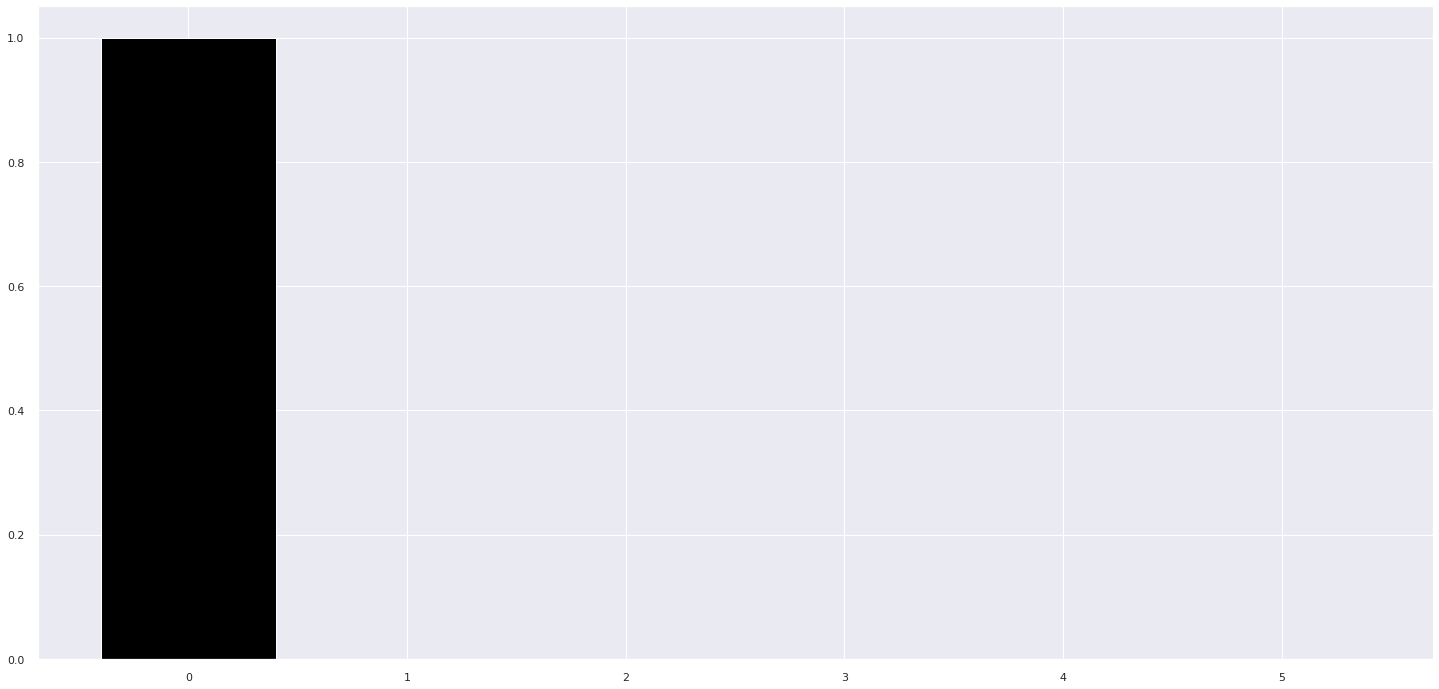

In [110]:
pca = dd.PCA( n_components = X.shape[1])


principal_components = pca.fit_transform(X)

# plot explained variables
features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_ratio_, color = 'black') #quais componentes principais com a maior variação de dados

# pca component
df_pca = pd.DataFrame( principal_components )

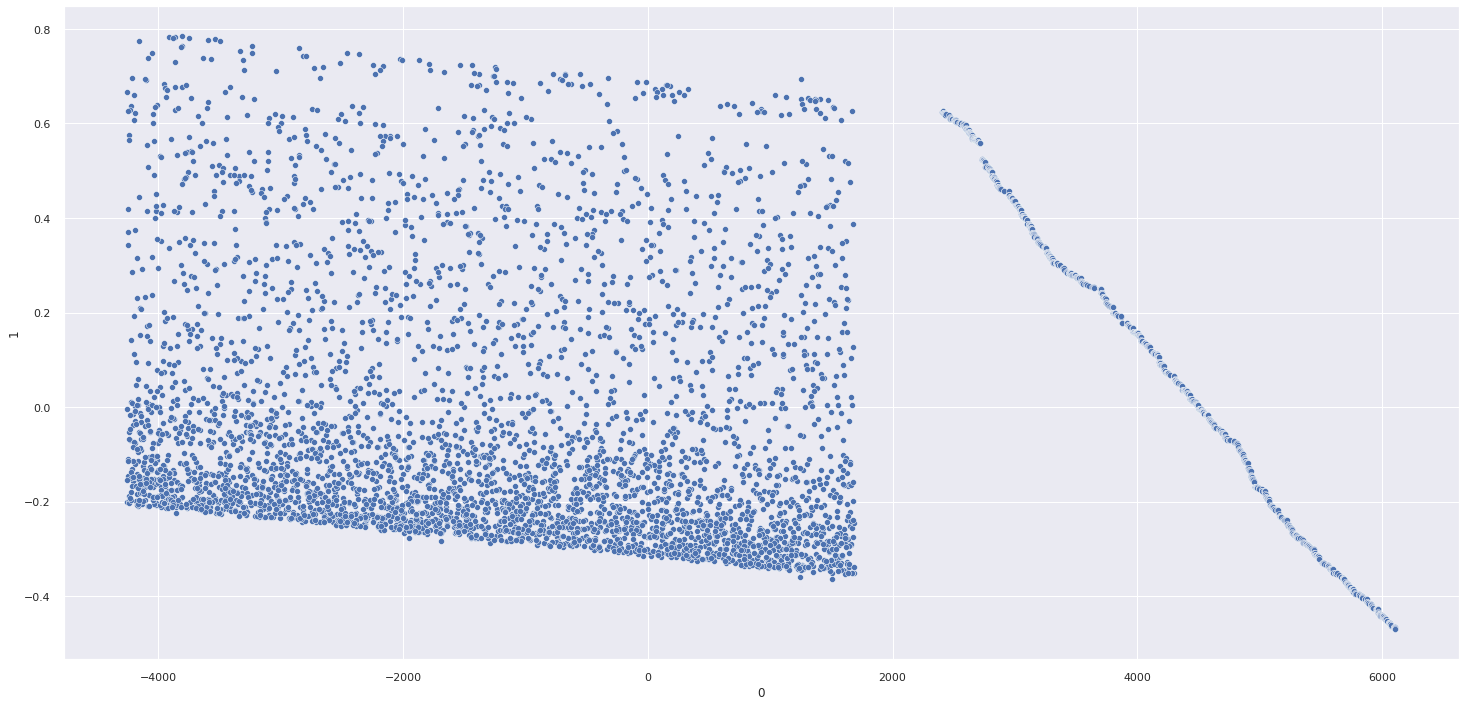

In [111]:
sns.scatterplot(x = 0, y = 1, data = df_pca);

In [112]:
df_pca.head()

,0,1,2,3,4,5
0,1249.401075,0.693026,-0.153468,0.917780,0.077792,-0.004034
1,-3553.598950,-0.073715,0.010584,-0.009343,0.004167,-0.000123
2,-4017.598953,-0.206669,0.020221,0.001769,0.001720,-0.001301
3,-2852.598947,0.013133,-0.004173,-0.019725,-0.004021,-0.000647
4,-1500.598931,0.616035,0.011247,-0.046534,-0.005851,-0.001373


#### UMAP

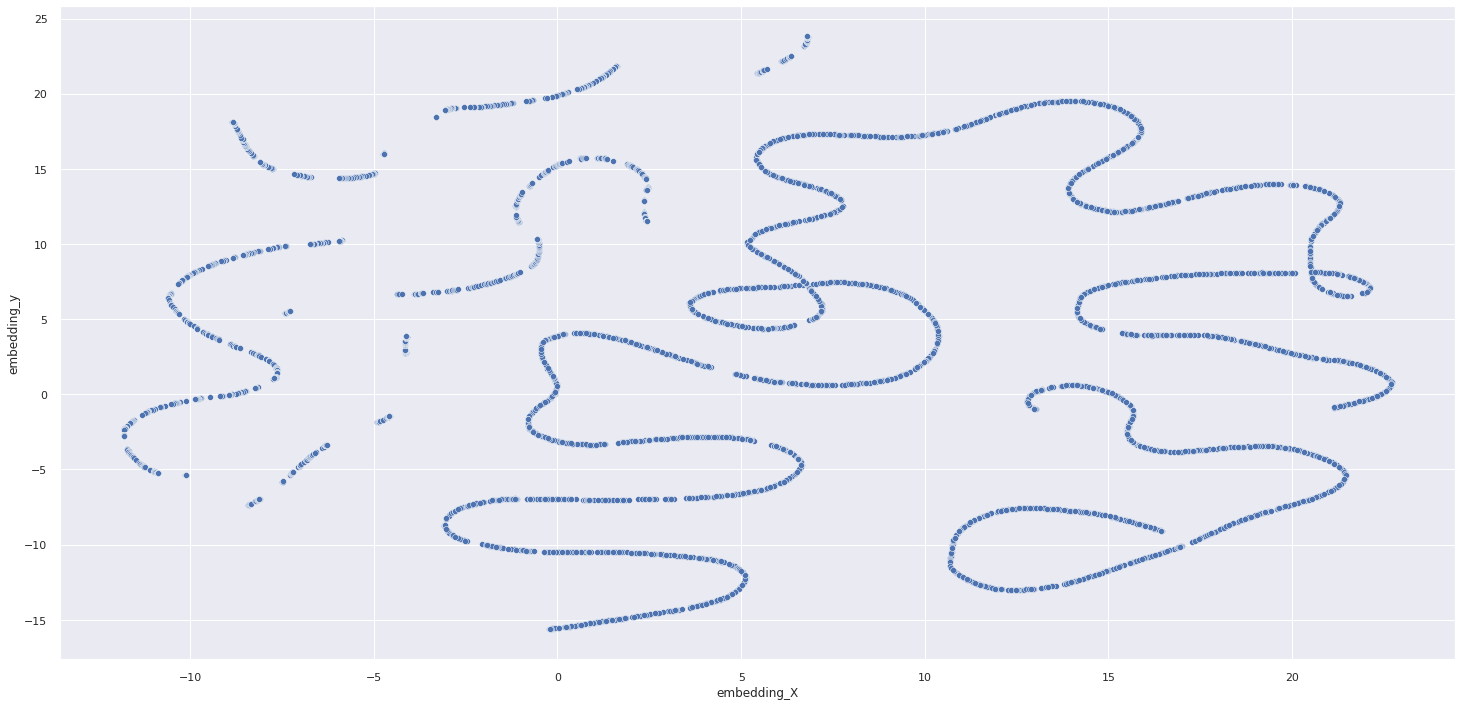

In [113]:
reducer = umap.UMAP(random_state = 42)
embedding = reducer.fit_transform(X) #gera o espaço projetado - embedding é a projeção gerada em outro espaço

#embedding
df_pca['embedding_X'] = embedding[:, 0]
df_pca['embedding_y'] = embedding[:, 1]

#plot UMAP - cluster projetado de alta dimencionalidade
sns.scatterplot(x = 'embedding_X', y = 'embedding_y',
                data = df_pca);

#### t-SNE

/home/marxcerqueira/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/marxcerqueira/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


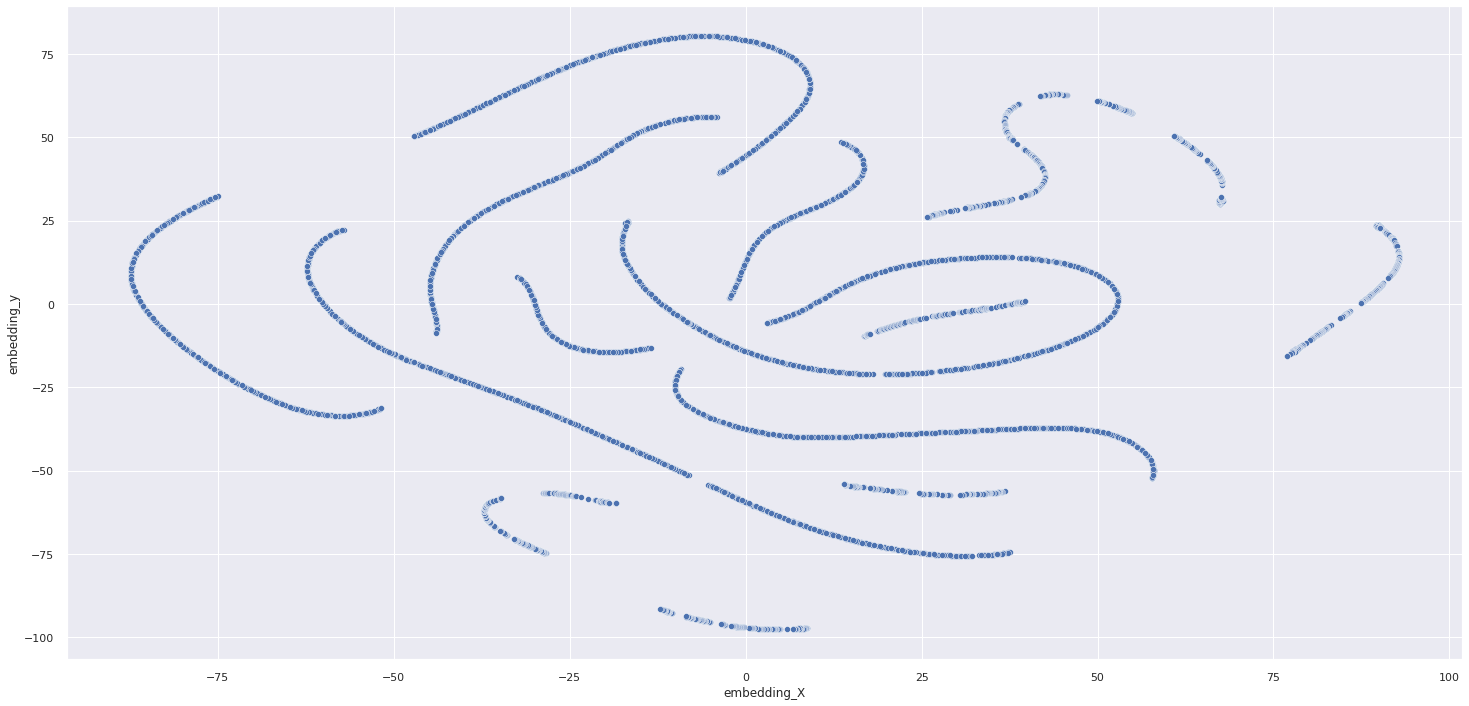

In [114]:
reducer = mn.TSNE( n_components = 2, n_jobs = -1, random_state = 42)
embedding = reducer.fit_transform(X) #gera o espaço projetado - embedding é a projeção gerada em outro espaço

#embedding
df_pca['embedding_X'] = embedding[:, 0]
df_pca['embedding_y'] = embedding[:, 1]

#plot UMAP - cluster projetado de alta dimencionalidade
sns.scatterplot(x = 'embedding_X', y = 'embedding_y',
                data = df_pca);

#### Tree-Based Embedding

In [115]:
df3.head()

,customer_id,gross_revenue,recency_days,qty_invoice_no,qty_items,qty_products,avg_ticket,frequency,qty_returns,avg_basket_size,avg_unique_basket_size
0,17850,5391.21,372.0,34.0,1733.0,297.0,18.152222,17.000000,40.0,50.970588,0.617647
1,13047,3232.59,56.0,9.0,1390.0,171.0,18.904035,0.028302,35.0,154.444444,11.666667
2,12583,6705.38,2.0,15.0,5028.0,232.0,28.902500,0.040323,50.0,335.200000,7.600000
3,13748,948.25,95.0,5.0,439.0,28.0,33.866071,0.017921,0.0,87.800000,4.800000
4,15100,876.00,333.0,3.0,80.0,3.0,292.000000,0.073171,22.0,26.666667,0.333333


In [124]:
df33.head()

,customer_id,gross_revenue,recency_days,qty_products,frequency,qty_returns
0,17850,0.019312,0.997319,0.037770,1.000000,0.000539
1,13047,0.011579,0.150134,0.021692,0.001345,0.000472
2,12583,0.024020,0.005362,0.029476,0.002052,0.000674
3,13748,0.003396,0.254692,0.003445,0.000734,0.000000
4,15100,0.003137,0.892761,0.000255,0.003985,0.000296


In [130]:
# training dataset 
X = df3.drop(columns = ['customer_id', 'gross_revenue'], axis = 1) #target variable
y = df3['gross_revenue']

# # training dataset (less features)
# X = df33.drop(columns = ['customer_id', 'gross_revenue'], axis = 1) #target variable
# y = df33['gross_revenue']

# I could use boruta to select features to build a better embedding space

# model definition
rf_model = en.RandomForestRegressor(n_estimators = 100, random_state = 42)

# model training
rf_model.fit(X,y)

# leaf

# dataframe leaf


RandomForestRegressor(random_state=42)

In [131]:
df_leaf = pd.DataFrame(rf_model.apply( X ))

In [132]:
X.shape

(5695, 9)

In [128]:
df_leaf.shape

(5695, 100)

In [121]:
df_leaf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,6220,6420,6318,6221,6398,6461,6458,6345,6143,6574,6153,6736,6328,6409,6431,6151,6214,6185,6357,6579,6467,6213,6294,6605,6400,6837,6495,5986,6284,6255,6587,6561,6192,6276,6223,6454,6536,6397,6234,6427,6125,6310,6580,6354,6164,6244,6415,6366,6206,6335,6532,6394,6034,5913,6717,6366,6135,6430,6411,6306,6047,6906,6072,6629,6398,6135,6431,6268,6220,6183,6561,6388,6339,6347,6351,6345,6339,6262,6345,6348,6139,6339,6639,6341,6516,6316,6390,6464,6295,6337,6415,6270,6349,6331,6205,6301,6229,6117,6258,6688
1,6193,6448,6221,6207,6342,6405,6366,6307,6103,6248,6204,6056,6159,6137,6066,6104,6129,6159,6293,6068,6457,6184,5887,6118,6357,6049,6326,5910,6200,6235,5850,6599,6176,6034,6183,6467,6445,6390,6277,5825,5597,5756,6107,6293,6142,6223,6356,6314,6169,6331,6443,5994,6012,6171,5895,6340,6100,5980,6338,6278,6284,5989,6197,6475,6357,6102,6212,6217,6183,6167,6171,6356,6116,6297,6313,6318,6253,6213,6328,6047,6161,6317,6016,6352,6399,5840,6371,6167,6205,6299,6465,6208,6017,5794,5998,6289,6213,6123,6135,6142
2,6915,6935,6765,6971,6879,7009,6725,6899,6902,7030,7027,6829,6913,6947,6914,6806,6679,6899,6755,6860,7024,6887,6929,6939,6965,6897,6873,7034,6830,6985,7003,7146,6983,6962,6921,7103,6999,6974,6831,6905,6809,6756,6934,6874,7011,6702,6950,6899,6968,6983,6999,6845,7007,6902,6837,6893,6837,6870,6858,6884,6948,6956,6973,6935,6951,6890,6840,6879,6944,6990,6892,6945,6822,6760,6922,6909,6889,6959,7046,6969,6958,6741,6884,7031,6747,6841,6807,6947,6682,6644,6970,6990,6948,6940,6855,6881,6939,6878,6977,7041
3,4251,3792,4479,4305,4411,4416,4354,3551,3671,4473,4350,3361,4136,4350,4220,4458,4420,4349,4004,3425,4377,4206,4059,4430,4485,4041,4429,4209,3939,4337,4322,4690,4247,4178,3929,4411,4579,3964,3404,4239,4511,4396,4988,4221,4355,4094,4527,4497,4396,4416,4545,4345,4357,4525,3555,4293,3988,3734,4400,4086,4513,4908,4609,4896,4177,4454,4173,3592,4170,4321,3640,3835,4383,4357,4063,4213,4626,4274,4395,4574,3638,4438,4386,4384,4834,4342,4227,4409,4396,4387,4191,3955,3958,4239,4074,4391,3226,4415,4005,4249
4,1818,2158,2177,1533,906,2291,1959,2082,2189,1677,809,1519,1481,2219,2018,2233,1814,1932,1884,2796,1048,1072,2187,1522,1647,2614,1216,1446,1724,1930,1719,1840,2182,1525,2076,1138,1683,1572,1820,2249,2137,1475,1818,1690,2126,2097,1534,2259,1425,1458,1912,1470,1354,1855,2008,2195,1388,2297,1514,2887,1046,1822,1928,1399,1897,1782,1829,929,2945,1238,902,2225,2214,1187,2073,1540,1170,1465,1980,2083,1334,2102,1467,1997,1636,1418,2179,2009,2123,2291,1108,1825,1885,2224,2040,1804,1861,2349,2957,2330


    y = nũmero de estimadores, quantidade árvores (decision tree cada coluna)
    x = clientes
    xy (pontos dentro da matriz) = posição da folha que o cliente caiu em cada árvore
    
    irá diminuir a explicabilidade do modelo porem aumenta a performance, pelo espaço de embedding com clusters bem espaçados e concentrados

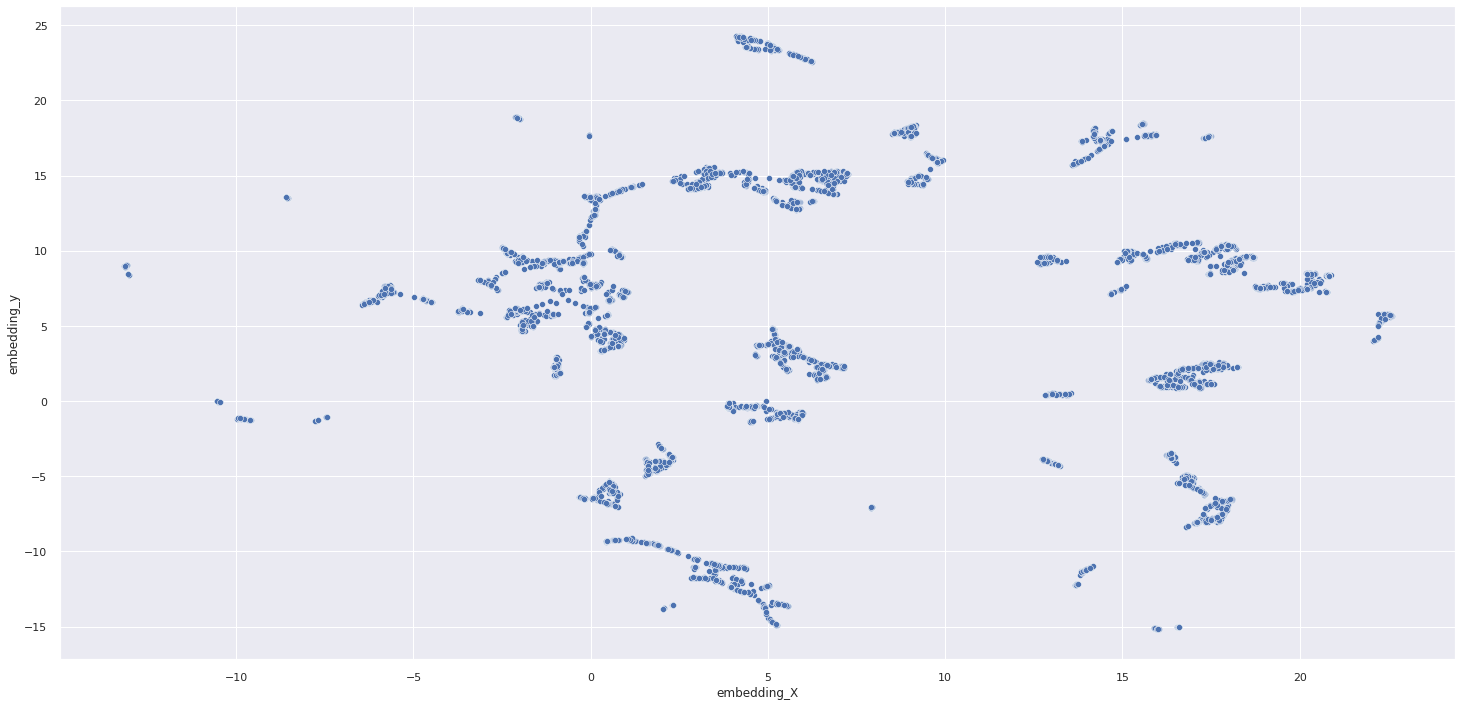

In [133]:
# using UMAP to reduce the space study from 100 to 2
reducer = umap.UMAP(random_state = 42)
embedding = reducer.fit_transform(df_leaf) #gera o espaço projetado - embedding é a projeção gerada em outro espaço

#embedding
df_tree = pd.DataFrame()
df_tree['embedding_X'] = embedding[:, 0]
df_tree['embedding_y'] = embedding[:, 1]

#plot UMAP - cluster projetado de alta dimencionalidade
sns.scatterplot(x = 'embedding_X', y = 'embedding_y',
                data = df_tree);

/home/marxcerqueira/.local/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


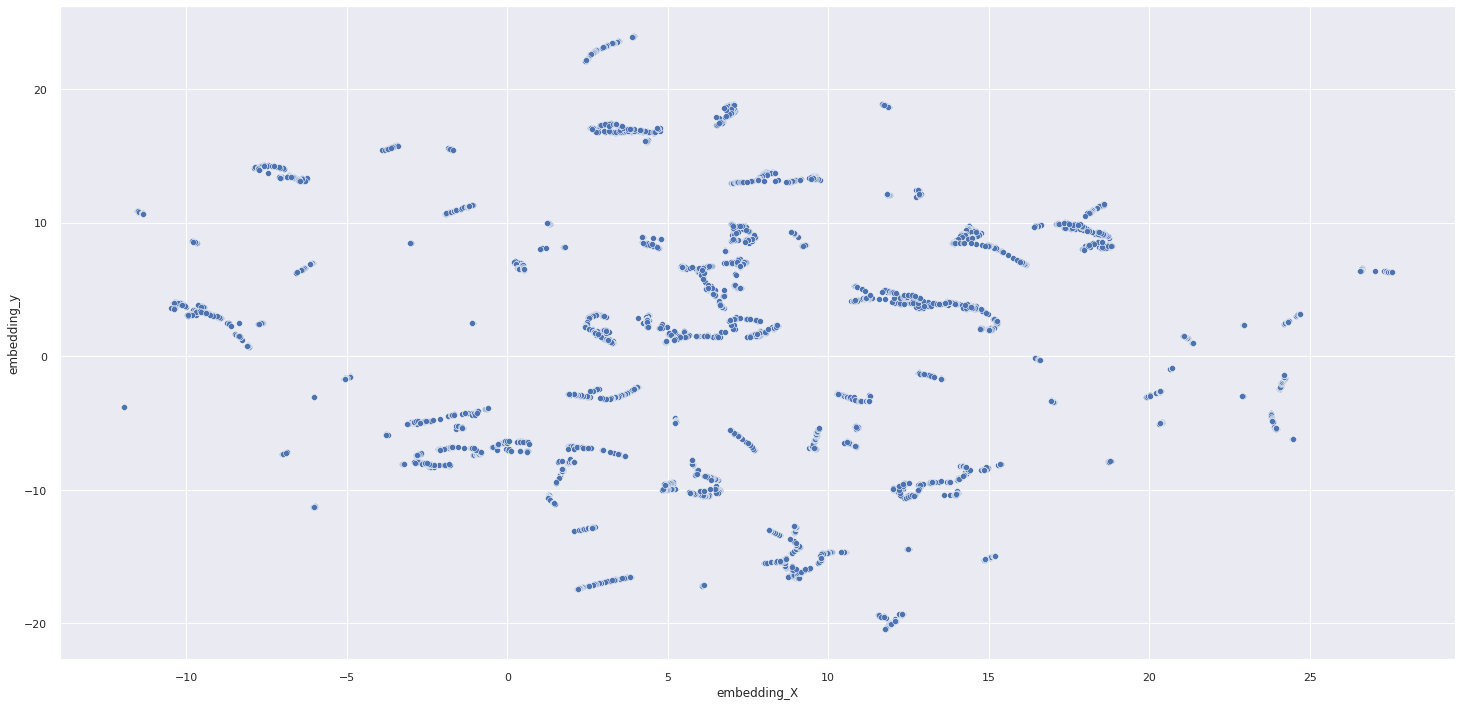

In [129]:
# # using UMAP to reduce the space study from 100 to 2
# reducer = umap.UMAP(random_state = 42)
# embedding = reducer.fit_transform(df_leaf) #gera o espaço projetado - embedding é a projeção gerada em outro espaço

# #embedding
# df_tree = pd.DataFrame()
# df_tree['embedding_X'] = embedding[:, 0]
# df_tree['embedding_y'] = embedding[:, 1]

# #plot UMAP - cluster projetado de alta dimencionalidade
# sns.scatterplot(x = 'embedding_X', y = 'embedding_y',
#                 data = df_tree);

# DATA PREPARATION

**Rules**

1. Distribuição Normal e não possui Outlier --> Standard Scaler - Média e desvio padrão, outliers influenciam na média
2. Distribuilção Normal e possui Outlier --> Robust Scaler -  Quartis, robusto à outliers
3. Não distribuição normal --> MinMax Scaler


**Testes de Normalidade:**
    
    QQ-plot - Quantile Quantile PLot (Quantile teorica x Quantile real)
    
    KS Test - Kolgomorov Smirnoff (Teste de Hipótese). Se o p-value > 0.5 -> Distribuição Normal, p-value <0.5 -> Não distribuição normal
    
**Detecção Outlier:**

    Box-plot --> pontos são identificados como Outliers
    
    IRQ*2.5 --> Acima desse valor (Outlier)
    
    Z-score < -3 e Z-score > 3 --> Outliers

In [134]:
# df4 = df3.copy()
df4 = df_tree.copy()

In [135]:
# df4_aux = df4.copy()

## Feature Rescaling

In [137]:
# ## MinMax Scaler
# mm = pp.MinMaxScaler()
# ss = pp.StandardScaler()
# rs = pp.RobustScaler()

# df4['gross_revenue']          = mm.fit_transform(df4[['gross_revenue']])
# df4['recency_days']           = mm.fit_transform(df4[['recency_days']])
# # df4['qty_invoice_no']         = mm.fit_transform(df4[['qty_invoice_no']])
# # df4['qty_items']              = mm.fit_transform(df4[['qty_items']])
# df4['qty_products']           = mm.fit_transform(df4[['qty_products']])
# # df4['avg_ticket']             = mm.fit_transform(df4[['avg_ticket']])
# # df4['avg_recency_days']       = mm.fit_transform(df4[['avg_recency_days']])
# df4['frequency']              = mm.fit_transform(df4[['frequency']])
# df4['qty_returns']           = mm.fit_transform(df4[['qty_returns']])
# # df4['avg_basket_size']        = mm.fit_transform(df4[['avg_basket_size']])
# # df4['avg_unique_basket_size'] = mm.fit_transform(df4[['avg_unique_basket_size']])

# variable = 'gross_revenue'

### Testing features

In [138]:
# Data as is
print('Min: {} - Max: {}'.format(df4_aux[variable].min(), df4_aux[variable].max()))
sns.displot(df4_aux[variable]);

KeyError: 'gross_revenue'

In [ ]:
# Data normalizados/rescalados
print('Min: {} - Max: {}'.format(df4[variable].min(), df4[variable].max()))
sns.displot(df4[variable]);

In [ ]:
# boxplot
sns.boxplot(df4_aux[variable]);

# FEATURE SELECTION

In [ ]:
# cols_selected = ['customer_id', 'gross_revenue', 'recency_days', 'qty_products', 'frequency', 'qty_returns']

In [140]:
# df5 = df4[cols_selected].copy()
df5 = df_tree.copy()

# HYPERPARAMETER FINE-TUNNING

In [ ]:
## clusterização é obrigado a fazer Rescaling para que as variáveis tenham o mesmo tamanho.
## Assistir live PCA

In [141]:
df6 = df5.copy()

In [142]:
# X = df6.drop('customer_id', axis = 1)
X = df_tree.copy()

In [143]:
X.head()

,embedding_X,embedding_y
0,15.747972,1.422308
1,16.976259,2.149289
2,16.801962,-8.347810
3,8.990779,17.760956
4,5.558530,3.204236


In [144]:
# clusters = [2, 3, 4, 5, 6, 7]
clusters = np.arange(2, 31, 1) #silhouette was increasing, so we put more k points
clusters

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

## K-Means

In [147]:
kmeans_sil = []

for k in clusters:
    # model definition
    kmeans_model = c.KMeans( n_clusters = k )

    # model training
    kmeans_model.fit(X)

    # model predict
    labels = kmeans_model.predict(X)

    # model performance
    sil = m.silhouette_score( X, labels, metric = 'euclidean')
    kmeans_sil.append(sil)  

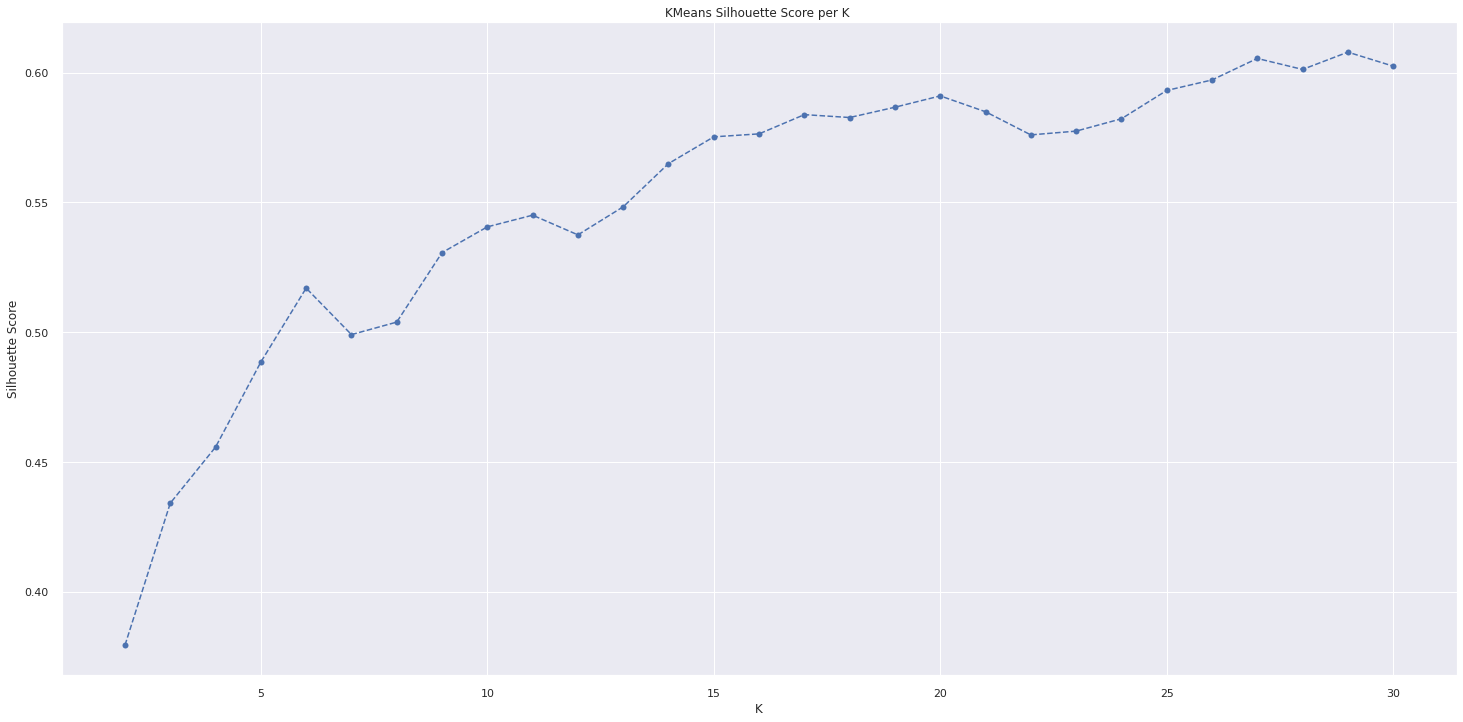

In [148]:
plt.plot( clusters, kmeans_sil, linestyle = '--', marker = 'o', color = 'b' )
plt.xlabel( 'K' );
plt.ylabel('Silhouette Score');
plt.title('KMeans Silhouette Score per K ');

## GMM

In [149]:
gmm_sil = []
for k in clusters:
    # model definition
    gmm_model = mx.GaussianMixture(n_components = k)
    
    # model training
    gmm_model.fit(X)
    
    # model prediction
    labels = gmm_model.predict(X)
    
    # model performance
    sil = m.silhouette_score(X, labels, metric = 'euclidean')
    gmm_sil.append(sil)

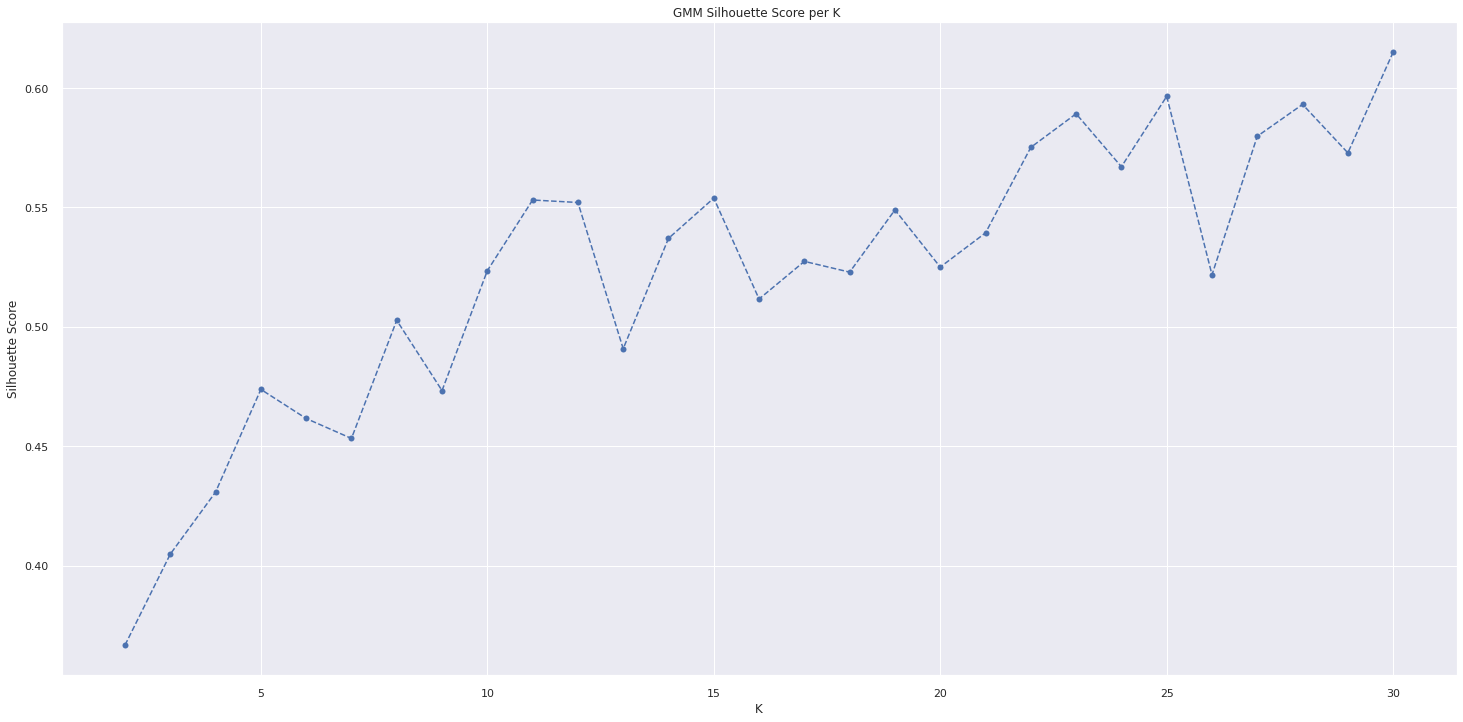

In [150]:
plt.plot(clusters, gmm_sil, linestyle = '--', marker = 'o', color = 'b')
plt.xlabel( 'K' );
plt.ylabel('Silhouette Score');
plt.title('GMM Silhouette Score per K ');

## Hierarchical Clustering

In [151]:
# model definition and training
hc_model = hc.linkage(X, 'ward')

# model prediction


# model performance

In [79]:
hc.dendrogram(hc_model, 
              leaf_rotation = 90,
              leaf_font_size = 8)

plt.plot()

NameError: name 'hc_model' is not defined

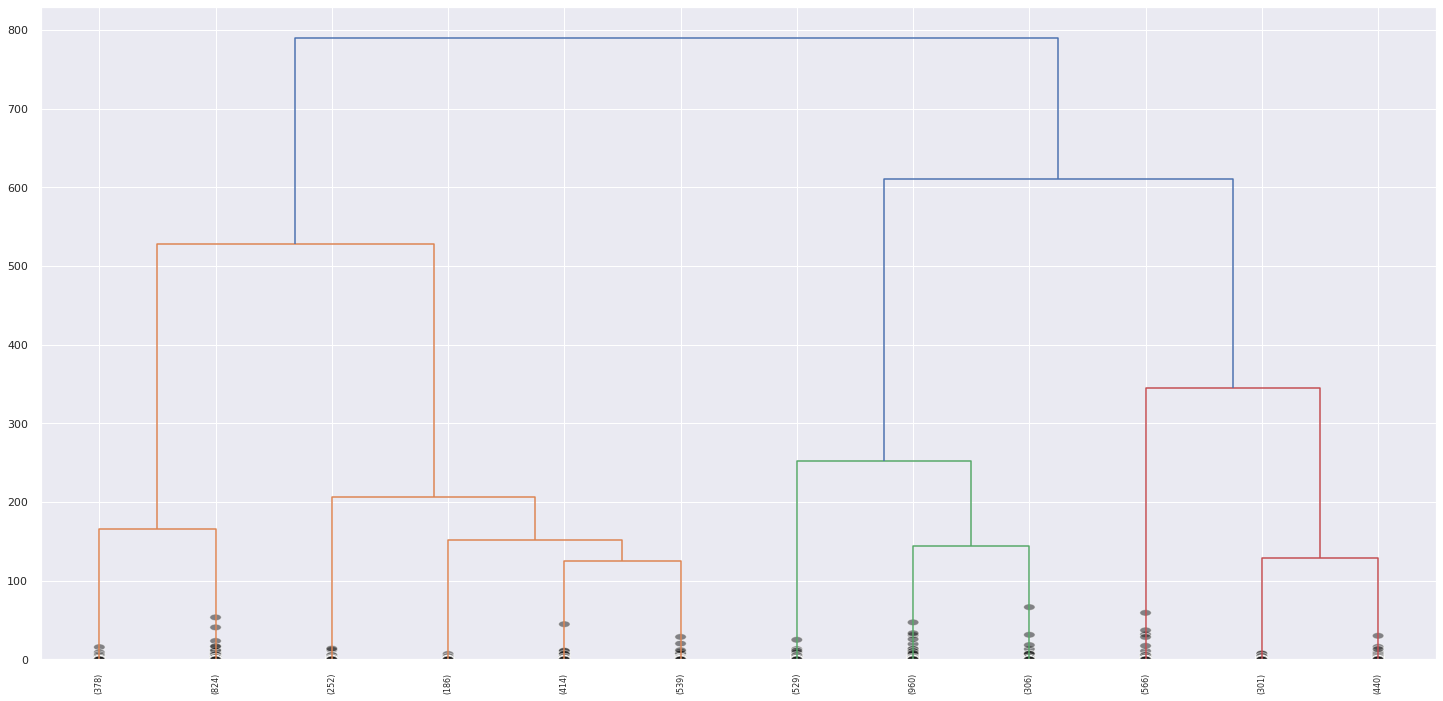

In [152]:
hc.dendrogram(hc_model,
              truncate_mode = 'lastp',
              p = 12,
              leaf_rotation = 90,
              leaf_font_size = 8,
              show_contracted = True)

plt.show()

### H-Clustering Silhouette Score

In [153]:
hc_sil = []
for k in clusters:
    #model definition and training
    hc_model = hc.linkage(X, 'ward')

    # model predict
    labels = hc.fcluster(hc_model, k, criterion = 'maxclust')

    # metrics
    sil = m.silhouette_score(X, labels, metric = 'euclidean')
    hc_sil.append(sil)

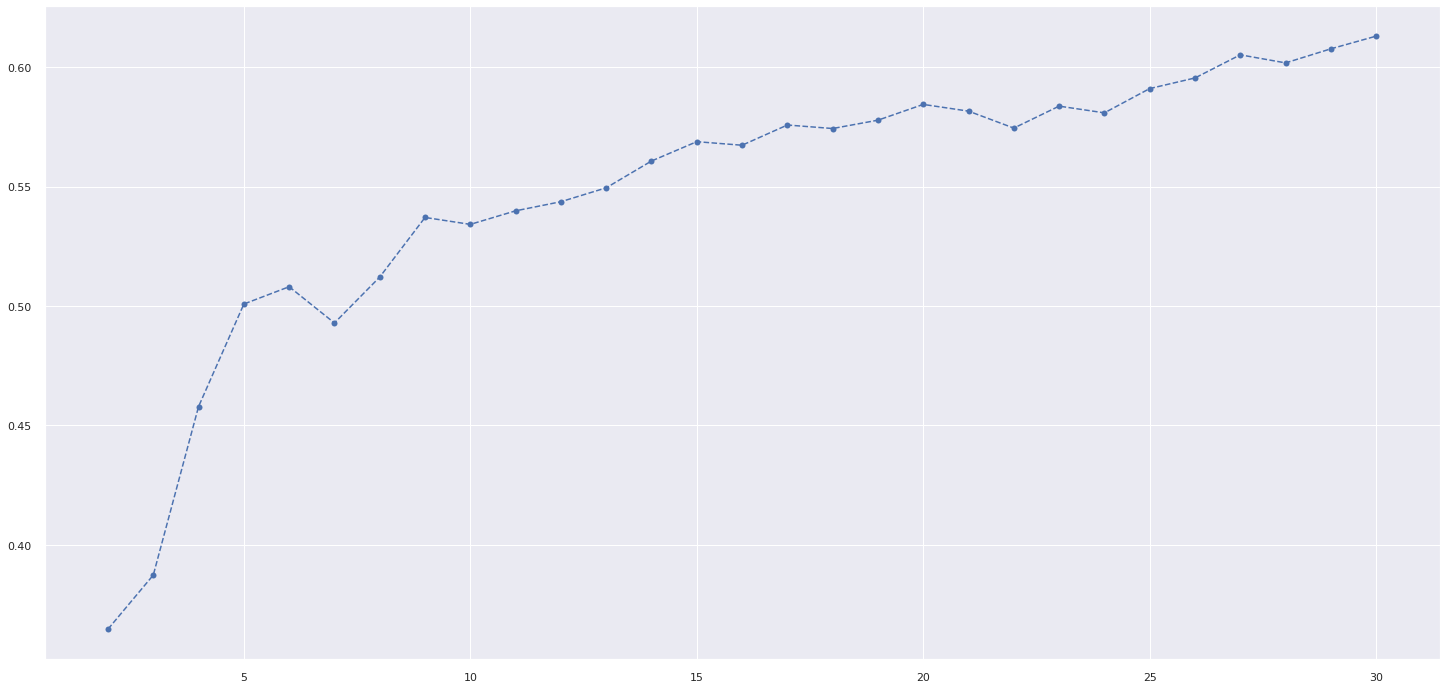

In [154]:
plt.plot(clusters, hc_sil, linestyle = '--', marker = 'o', color = 'b')

## DBSCAN

In [155]:
eps = 2 #radius
min_samples = 20 #number of points within the radius

# model definition
dbscan_model = c.DBSCAN(eps = eps, min_samples=min_samples)

# model training and predict
labels = dbscan_model.fit_predict(X)

sil = m.silhouette_score(X, labels, metric = 'euclidean')
print('Silhouette Score: {}'.format(sil))
print('Number of Clusters: {}'.format(len(unique(labels))))
print(unique(labels))

Silhouette Score: 0.4253165125846863
Number of Clusters: 18
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


In [156]:
from sklearn.neighbors import NearestNeighbors 

In [157]:
# encontrar um numero de visinhos proximos, e tirar média da distancia, fazer isso em todos os pontos
neighbors = NearestNeighbors(n_neighbors = min_samples).fit(X)
distances, indices = neighbors.kneighbors(X)

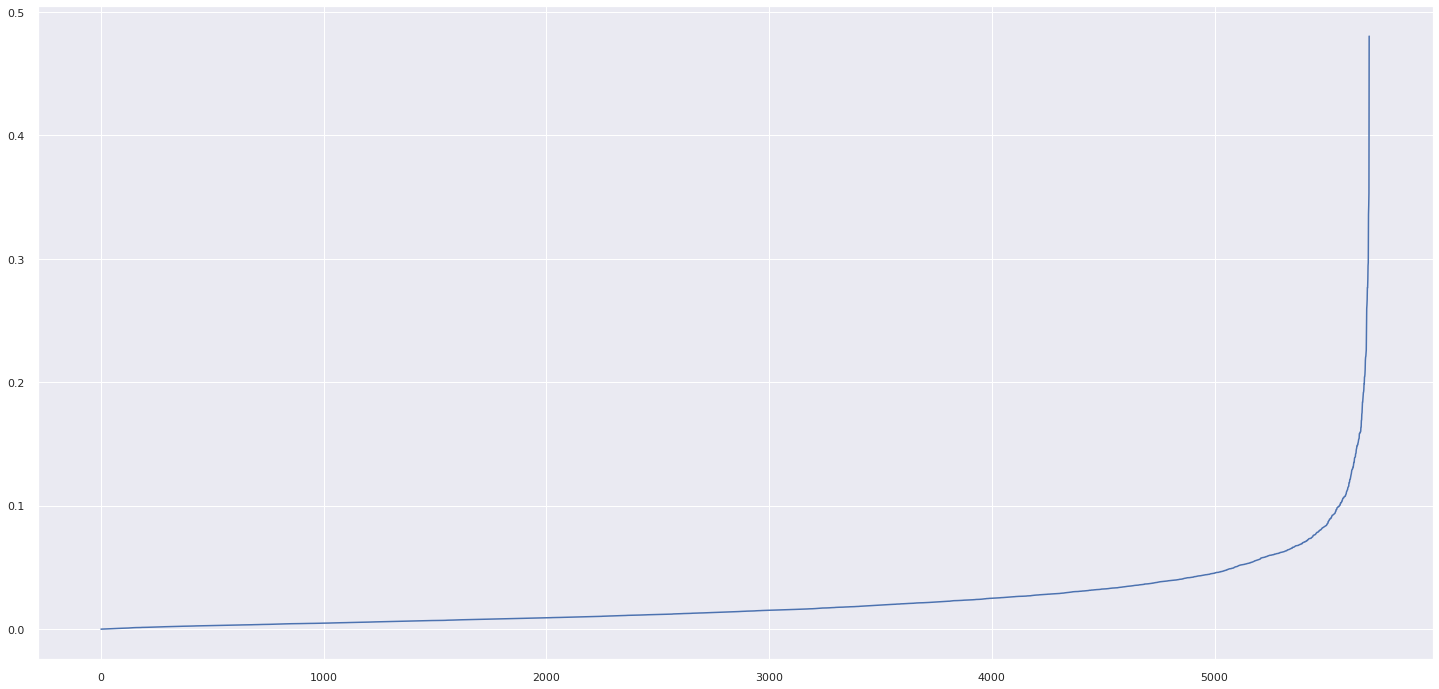

In [158]:
# the idea is to get the number of the radius, which is the point nearest to the curve (elbow)
distances = np.sort(distances, axis = 0)
distances = distances[:, 1]
plt.plot(distances)

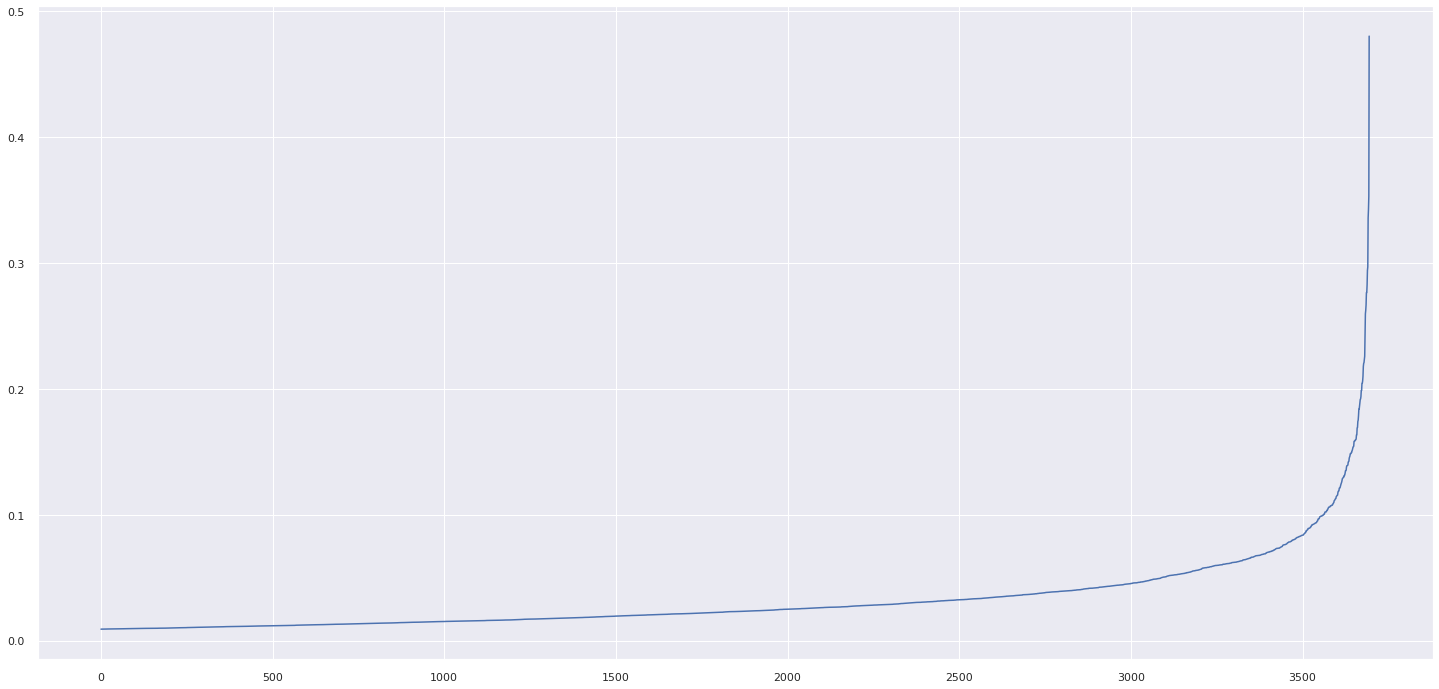

In [159]:
plt.plot(distances[2000:])

In [87]:
dbscan_sil = [0.622034, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000]

## Results

In [160]:
# model name / k=2 / k=3 / k=4 / k=5
# Kmeans       SS    SS     SS    SS
# GMM          SS    SS     SS    SS
# HC           SS    SS     SS    SS
# DBSCAN       SS    SS     SS    SS

df_results = pd.DataFrame({'KMeans:': kmeans_sil,
                           'GMM': gmm_sil,
                           'HC': hc_sil}
#                            'DBSCAN': dbscan_sil}
                           ).T

df_results.columns = clusters

In [161]:
df_results.style.highlight_max(color = 'lightgreen', axis = 1)

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
KMeans:,0.379430,0.434125,0.455731,0.488490,0.516955,0.499052,0.503862,0.530628,0.540549,0.545049,0.537463,0.548276,0.564920,0.575224,0.576364,0.583777,0.582667,0.586632,0.590993,0.584890,0.575975,0.577426,0.582181,0.593086,0.597133,0.605417,0.601187,0.607852,0.602453
GMM,0.366658,0.404763,0.430740,0.473748,0.461558,0.453206,0.502658,0.473239,0.523420,0.553034,0.551998,0.490761,0.536973,0.553818,0.511580,0.527337,0.522836,0.548888,0.524953,0.539269,0.575086,0.589145,0.566962,0.596436,0.521731,0.579730,0.593060,0.572765,0.614950
HC,0.364693,0.387326,0.457890,0.500822,0.508064,0.492889,0.512110,0.537069,0.534170,0.539842,0.543664,0.549474,0.560699,0.568796,0.567306,0.575774,0.574305,0.577797,0.584395,0.581586,0.574481,0.583675,0.580867,0.591032,0.595471,0.605159,0.601783,0.607676,0.612988


## Silhouette Analysis

For K = 2. Silhouette Score: 0.3646931052207947
For K = 3. Silhouette Score: 0.3873259127140045
For K = 4. Silhouette Score: 0.45789000391960144
For K = 5. Silhouette Score: 0.5008218288421631
For K = 6. Silhouette Score: 0.5080639123916626
For K = 7. Silhouette Score: 0.4928887188434601


IndexError: index 3 is out of bounds for axis 0 with size 3

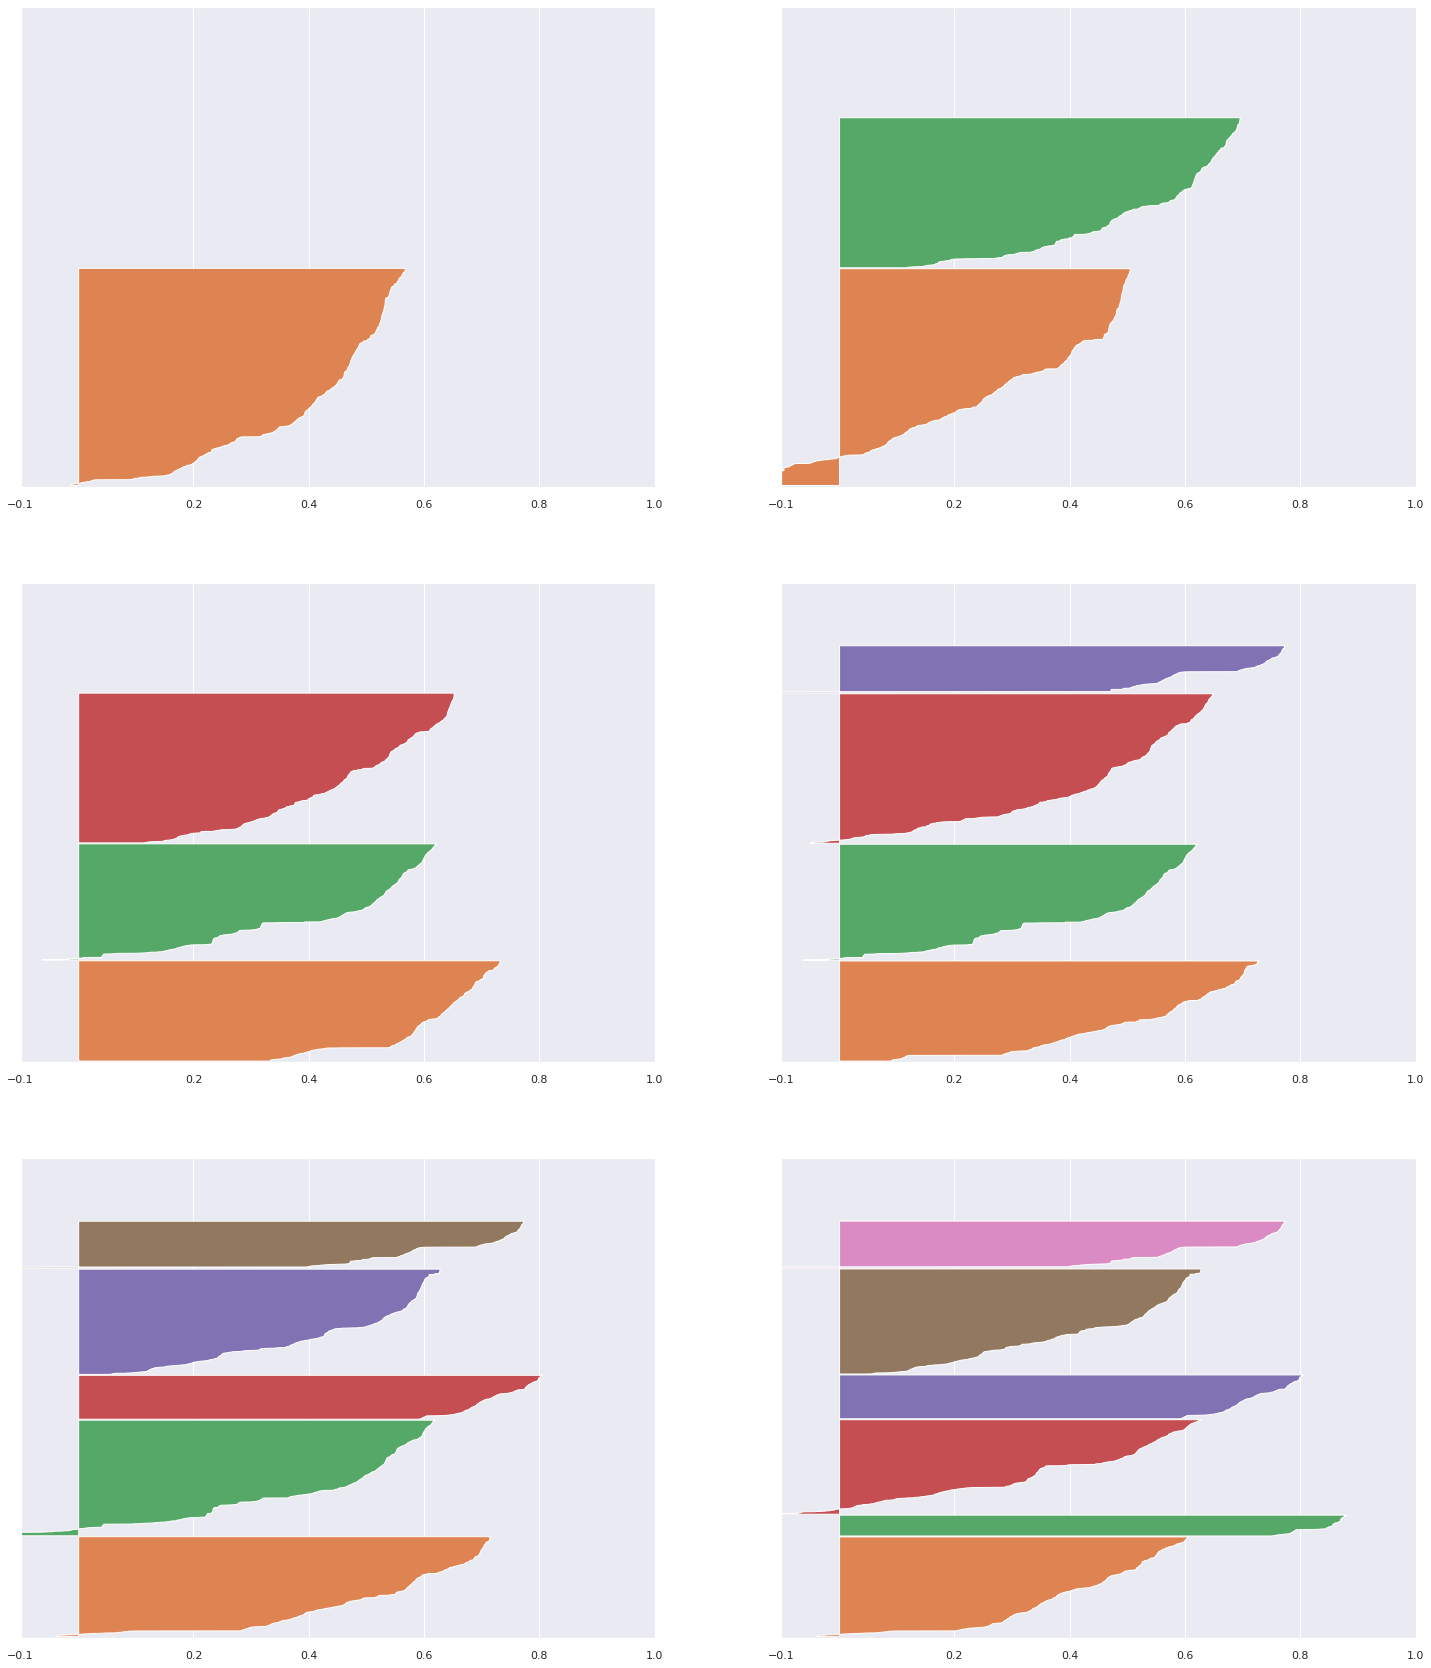

In [162]:
fig, ax = plt.subplots(3, 2)
fig.set_size_inches(25,30)

for k in clusters:
    q, mod = divmod(k, 2)
    
    ax[q-1, mod].set_xlim([-0.1, 1])
    ax[q-1, mod].set_ylim([0, len(X) + (k+1)*10])
    
    # model definition and training
    hc_model = hc.linkage(X, 'ward')

    # model predict
    labels = hc.fcluster(hc_model, k, criterion = 'maxclust')

    # model performance
    ss = m.silhouette_score(X, labels, metric = 'euclidean')
    print('For K = {}. Silhouette Score: {}'.format(k, ss))
    
    samples_silhouette_values = m.silhouette_samples(X, labels)
    
    y_lower = 10
    
    for i in range(k):
        # select clusters
        ith_samples_silhouette_values = samples_silhouette_values[labels == i]
        
        # sort values
        ith_samples_silhouette_values.sort()

        # size clusters
        size_cluster_i = ith_samples_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        cmap = cm.get_cmap('Spectral')
        color = cmap(i/k)
        
        ax[q-1, mod].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_samples_silhouette_values)
        
        y_lower = y_upper + 10
    
    ax[q-1, mod].set_yticks([])
    ax[q-1, mod].set_xticks([-0.1, 0.2, 0.4, 0.6, 0.8, 1])
        

In [163]:
samples_silhouette_values

array([0.34292227, 0.45792988, 0.767693  , ..., 0.2832383 , 0.5475371 ,
       0.18496403], dtype=float32)

## Whitin-Cluster Sum of Square (WSS)

In [ ]:
clusters = [2, 3, 4, 5, 6, 7]

In [ ]:
kmeans = KElbowVisualizer(c.KMeans(), k = clusters, timings = False)
kmeans.fit(X)
kmeans.show();
# quero clusters condensados (distancia do centroide e pontos no mesmo cluster pequena) e espaçados (distancia entre centroides de clusters alta). ONde consigo? Onde há maior variação (elbow)

## Sillhouette Score

In [ ]:
kmeans = KElbowVisualizer(c.KMeans(), k = clusters, metric = 'silhouette', timings = False)
kmeans.fit(X)
kmeans.show();

### Silhouette Analysis

In [ ]:
fig, ax = plt.subplots(3, 2, figsize = (25, 18))

for k  in clusters:
    km = c.KMeans(n_clusters = k, init = 'random', n_init = 10, max_iter = 100, random_state = 42)
    #truque: divisão com moda (para visualizacao)
    q, mod = divmod(k, 2)
    
    visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax = ax[q-1][mod])
    visualizer.fit(X)
    visualizer.finalize();

. Silhueta bem ruim a priore, o cluster maior está absorvendo os menores, se sobressaindo.

. Apenas com essas features criadas

ainda não fizemos extração dos prod retornados, dados bagunçados q podem estar confundindo o algoritmo, nao fizemos rescala para uma comparação mais justa das features, nao criamos novas features

. series temporais e clusterização é mais fácil fazer em R, há funções bem otimizadas já.

# MACHINE LEARNING MODEL TRAINING

## K-Means

In [191]:
# # model definition
k = 8;
# kmeans = c.KMeans(init = 'random', n_clusters = k, n_init = 10, max_iter = 300, random_state = 42)

# # model training
# kmeans.fit(X)

# # clustering
# labels = kmeans.labels_

In [192]:
# trying with GMM beacuse of its approach in the embedding space
# k=11 ;
# model definition
kmeans = mx.GaussianMixture(n_components = k)

# model training
kmeans.fit(X)

# model prediction
labels = kmeans.predict(X)

## Cluster Validation

In [193]:
# WSS (Within-cluster Sum of Square )
# print('WSS score: {}'.format(kmeans.inertia_))

# SS (Silhouette Score)
print('SS score: {}'.format(m.silhouette_score(X, labels, metric = 'euclidean')))

SS score: 0.5172834396362305


## Compare Model's Performance

# CLUSTER ANALYSIS

In [205]:
X.head()

,embedding_X,embedding_y
0,15.747972,1.422308
1,16.976259,2.149289
2,16.801962,-8.347810
3,8.990779,17.760956
4,5.558530,3.204236


In [203]:
df9 = X.copy()
df9['cluster'] = labels
df9.head()

,customer_id,gross_revenue,recency_days,qty_products,frequency,qty_returns,cluster
0,17850,5391.21,372.0,297.0,17.000000,40.0,4
1,13047,3232.59,56.0,171.0,0.028302,35.0,4
2,12583,6705.38,2.0,232.0,0.040323,50.0,3
3,13748,948.25,95.0,28.0,0.017921,0.0,6
4,15100,876.00,333.0,3.0,0.073171,22.0,7


In [206]:
# #df9 = df4.copy()
# df9['cluster'] = labels
df9.head()

,embedding_X,embedding_y,cluster
0,15.747972,1.422308,4
1,16.976259,2.149289,4
2,16.801962,-8.347810,3
3,8.990779,17.760956,6
4,5.558530,3.204236,7


## Visualization Inspection

<AxesSubplot:xlabel='embedding_X', ylabel='embedding_y'>

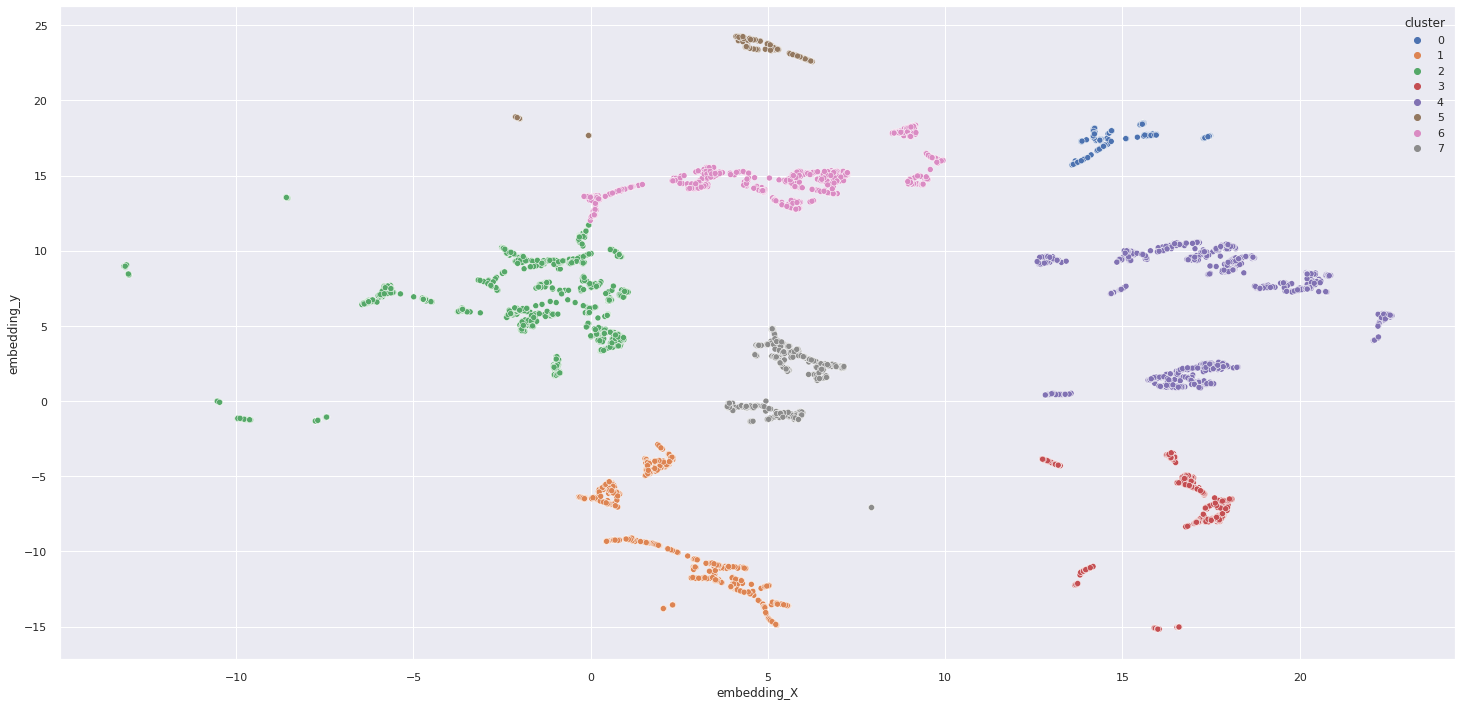

In [207]:
sns.scatterplot(x = 'embedding_X', y = 'embedding_y', hue = 'cluster', data = df9, palette = 'deep')

<AxesSubplot:xlabel='embedding_X', ylabel='embedding_y'>

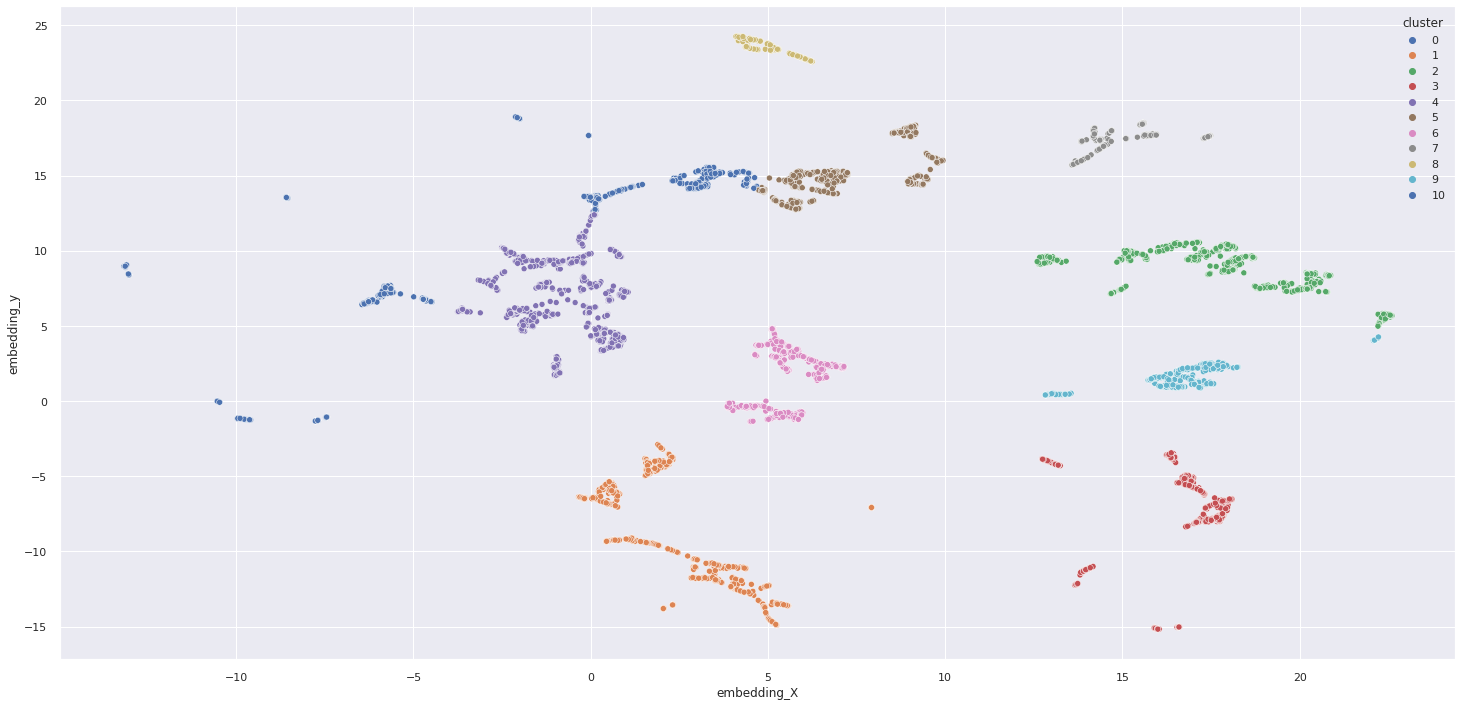

In [178]:
# k = 11 for GMM
sns.scatterplot(x = 'embedding_X', y = 'embedding_y', hue = 'cluster', data = df9, palette = 'deep')

<AxesSubplot:xlabel='embedding_X', ylabel='embedding_y'>

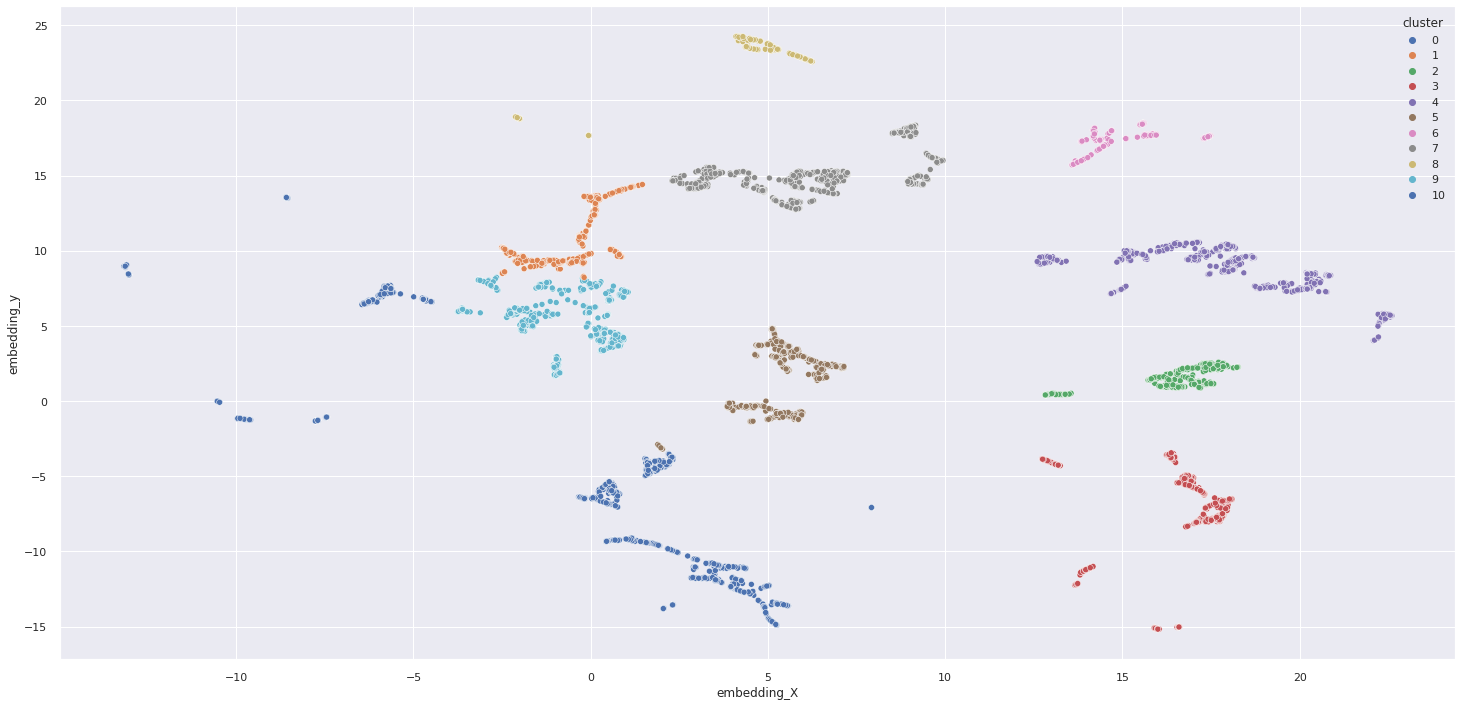

In [168]:
# k = 11 for KNN
# sns.scatterplot(x = 'embedding_X', y = 'embedding_y', hue = 'cluster', data = df9, palette = 'deep')

In [98]:
# # apenas para 3 features
# fig = px.scatter_3d(df9, x = 'recency_days', y = 'purchase_frequency', z = 'gross_revenue', color = 'cluster')
# fig.show();

In [99]:
# visualizer = SilhouetteVisualizer(kmeans, colores = 'yellowbrick')
# visualizer.fit(X)
# visualizer.finalize()

## 2D plot

In [197]:
# df_viz = df9.drop(columns = 'customer_id', axis = 1)
# # sns.pairplot(df_viz, hue = 'cluster')

## UMAP - t-SNE

**Machine Learning - Manifold (aprendizado por topologia)**

PCA - Matrix, Espaço de Distâncias - Espaço Hilbert - 9 condições para cumprir - Colorários (garantia para que a distancia naquele espaço funciona

UMAP, t-SNE (2009) - Manifold - Topologia

### UMAP

funciona muito bem quando temos grande volume de dados, mais rápido.
t-SNE para poucos dados é mais rápido

In [198]:
# reducer = umap.UMAP(n_neighbors = 90 ,random_state = 42)
# embedding = reducer.fit_transform(X) #gera o espaço projetado - embedding é a projeção gerada em outro espaço

# #embedding
# df_viz['embedding_X'] = embedding[:, 0]
# df_viz['embedding_y'] = embedding[:, 1]

# #plot UMAP - cluster projetado de alta dimencionalidade
# sns.scatterplot(x = 'embedding_X', y = 'embedding_y',
#                 hue = 'cluster',
#                 palette = sns.color_palette('hls', n_colors = len(df_viz['cluster'].unique())),
#                 data = df_viz);


## Cluster Profile

Where we do an analysis of the clusters

calcula o ponto em que vai representar o clusters.

sempre a representação do customer é em relação ao ponto médio (centróide)

In [204]:
df92 = df3[cols_selected].copy()
df92['cluster'] = labels
df92.head()

,customer_id,gross_revenue,recency_days,qty_products,frequency,qty_returns,cluster
0,17850,5391.21,372.0,297.0,17.000000,40.0,4
1,13047,3232.59,56.0,171.0,0.028302,35.0,4
2,12583,6705.38,2.0,232.0,0.040323,50.0,3
3,13748,948.25,95.0,28.0,0.017921,0.0,6
4,15100,876.00,333.0,3.0,0.073171,22.0,7


In [208]:
# Explaining clusters profile based on this averages
# Number of customer
df_cluster = df92[['customer_id', 'cluster']].groupby( 'cluster' ).count().reset_index()
df_cluster['perc_customer'] = 100*( df_cluster['customer_id'] / df_cluster['customer_id'].sum() )

# Avg Gross revenue
df_avg_gross_revenue = df92[['gross_revenue', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_gross_revenue, how='inner', on='cluster' )

# Avg recency days
df_avg_recency_days = df92[['recency_days', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_recency_days, how='inner', on='cluster' )

# Avg qty products
df_qty_products = df92[['qty_products', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_qty_products, how='inner', on='cluster' )

# Frequency
df_frequency = df92[['frequency', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_frequency, how='inner', on='cluster' )

# Avg qty returns
df_qty_returns = df92[['qty_returns', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_qty_returns, how='inner', on='cluster' )

df_cluster

,cluster,customer_id,perc_customer,gross_revenue,recency_days,qty_products,frequency,qty_returns
0,0,252,4.424934,1425.519365,167.178571,161.626984,0.951233,0.535714
1,1,741,13.011414,81.786721,189.327935,8.636977,0.970043,0.538462
2,2,1266,22.230026,352.036714,143.379147,28.221169,0.711299,2.023697
3,3,551,9.675154,10410.051071,45.179673,366.179673,0.210759,266.379310
4,4,1202,21.106234,2003.118494,59.188852,132.608153,0.203510,16.760399
5,5,228,4.003512,1190.443026,106.087719,107.065789,0.498098,4.675439
6,6,911,15.996488,757.122953,90.108672,51.301866,0.333451,6.846323
7,7,544,9.552239,246.872132,183.176471,22.511029,0.881893,1.384191


In [ ]:
# during the new EDA we can do a analyse inside each cluster

Cluster 01:

- Number of customers: 6 (0.14% of costumers)
- Recency Average: 7 days (6.36%)
- Purchase Average: 89 purchases
- Gross Revenue Average: $182,181.89 

Cluster 02:

- Number of customers: 31 (0.7% of costumers)
- Recency Average: 14 days
- Purchase Average: 53 purchases
- Gross Revenue Average: $40.543,51

Cluster 03:

- Number of customers: 4335 (99.15% of costumers)
- Recency Average: 92 days
- Purchase Average: 5 purchases
- Gross Revenue Average: $1.372,58

# Exploratory Dada Analysis

## Hypotesis Mindmap

## Business Hypothesis

## Hypothesis Prioritization

## Hypothesis Validation

## Response Framework

# MODEL DEPLOYMENT